In [31]:
import pandas as pd
import numpy as np

In [32]:
# Load all datasets into a list of DataFrames
datasets = []
for year in range(2010, 2018):
    filename = f"../data/{year}_clean.csv"
    df = pd.read_csv(filename)
    datasets.append(df)

In [61]:
# Calculate the number of observations (rows) for each dataset
observations = []
for year, df in zip(range(2010, 2018), datasets):
    observation_count = len(df)
    observations.append({'Year': year, 'Number Of Observation': observation_count})

# Create a DataFrame to store the observation counts
observations_df = pd.DataFrame(observations)

# Print the observation counts
print(observations_df)

   Year  Number Of Observation
0  2010                    227
1  2011                    255
2  2012                    250
3  2013                    206
4  2014                    231
5  2015                    200
6  2016                    269
7  2017                    256


Text(0.5, 1.0, 'No of Observation over Year')

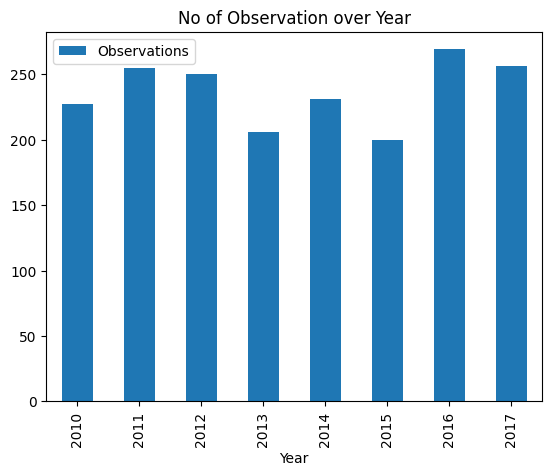

In [34]:
import matplotlib.pyplot as plt
observations_df.plot(kind='bar',x='Year',y='Observations')
plt.title('No of Observation over Year')

## Region

In [35]:
# Create a dictionary to store region counts for each year
region_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    region_count = df['Region'].value_counts().to_dict()
    region_counts[year] = region_count

# Create a DataFrame to store the region counts
Regions_df = pd.DataFrame(region_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
Regions_df = Regions_df.fillna(0)

# Convert the values to integers
Regions_df = Regions_df.astype(int)

# Reset the index and rename the index column to 'Year'
Regions_df = Regions_df.reset_index().rename(columns={'index': 'Region'})


In [36]:
Regions_df

Region  2010  2011  2012  2013  2014  2015  2016  2017
0             Polonnaruwa    74     0    72    63    57    37    54    47
1           North Western    66    82    63    18    14    15     0     0
2                 Eastern    42    33    44    29    49    52    55    56
3                Southern    35    36    29    18    40    12    26    16
4             YalaBundala     8    11     4     0     0     0     0     0
5                 Central     2     3     5     7     8     5     5     4
6                Mahaweli     0    90     0     0     0     0     0     0
7            Anuradhapura     0     0    19    49    32    28    41    30
8                     Uva     0     0    14    22    16    13    14    25
9                Vavuniya     0     0     0     0    10    12    16    13
10            Kilinochchi     0     0     0     0     5     4     2     4
11            Trincomalee     0     0     0     0     0    22    30    22
12                Wayamba     0     0     0     0     0     0    16    15
13               Puttalam     0     0     0     0     0     0    10    17
14  Elephant Transit Home     0     0     0     0     0     0     0     7

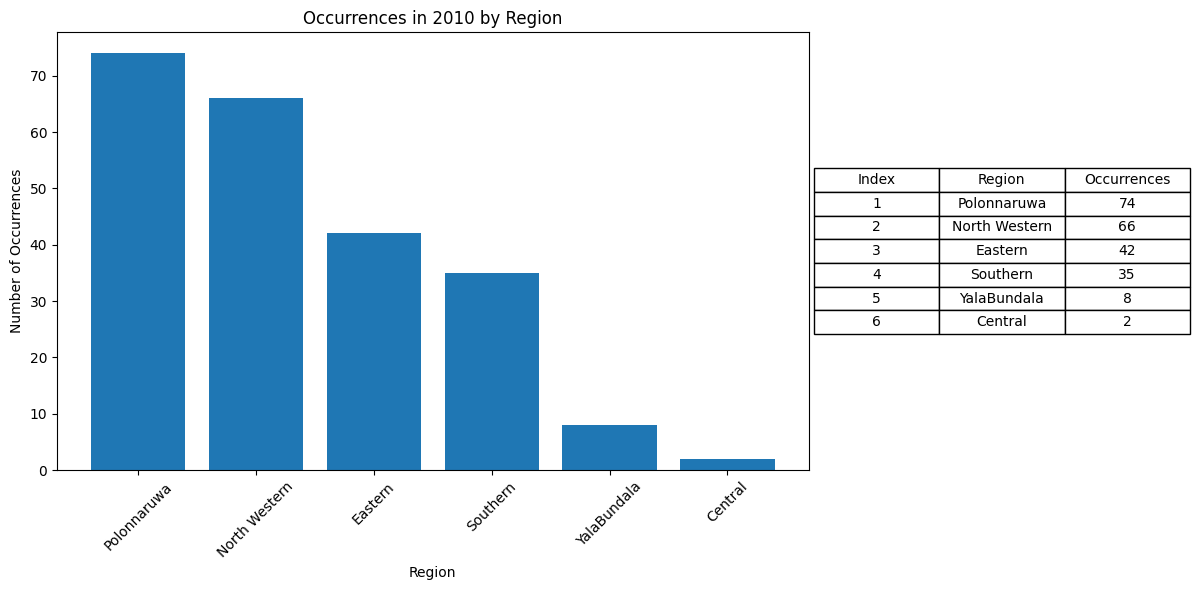

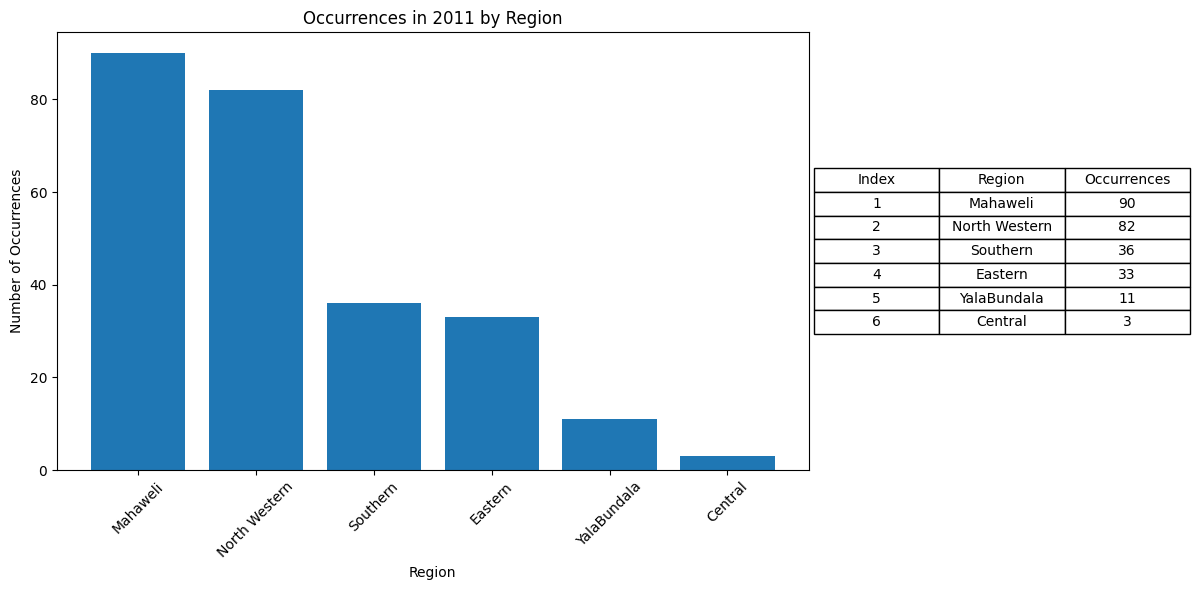

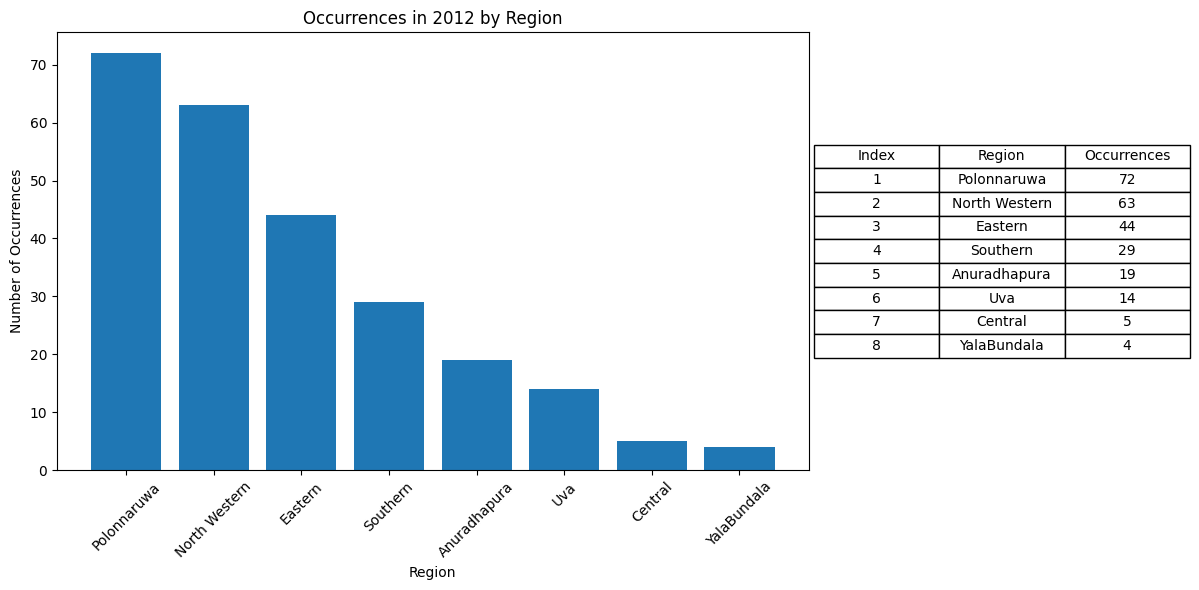

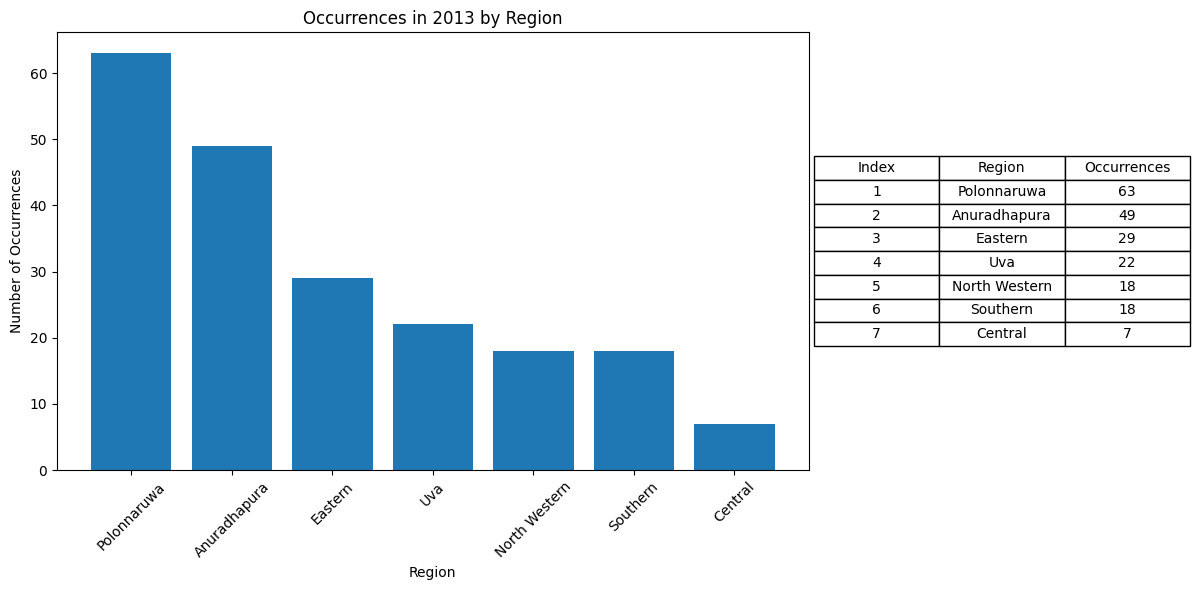

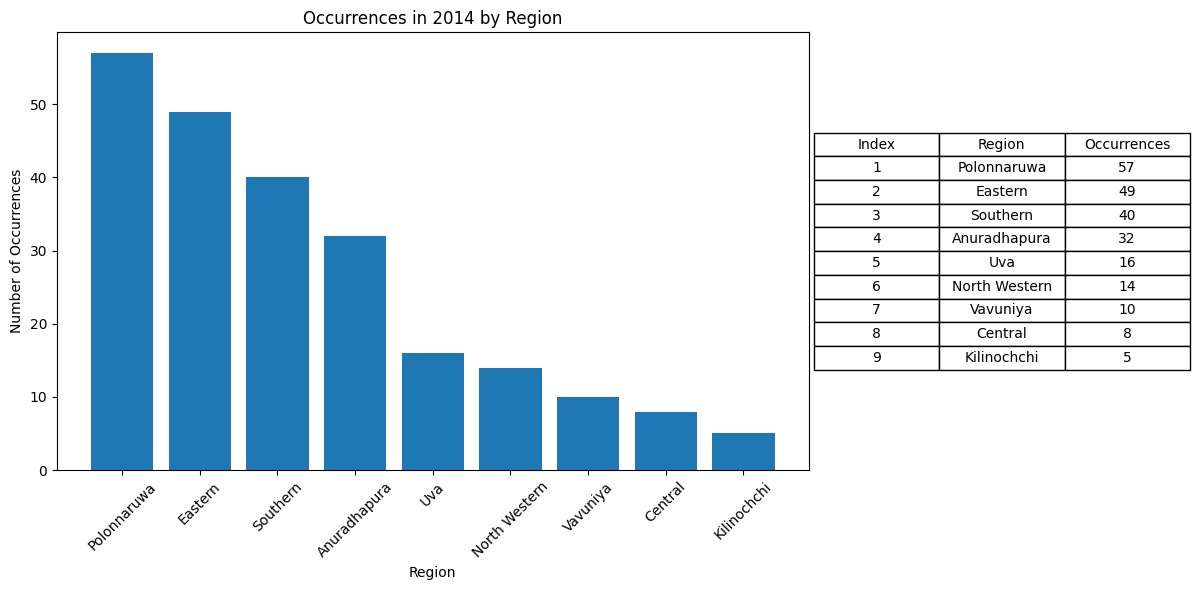

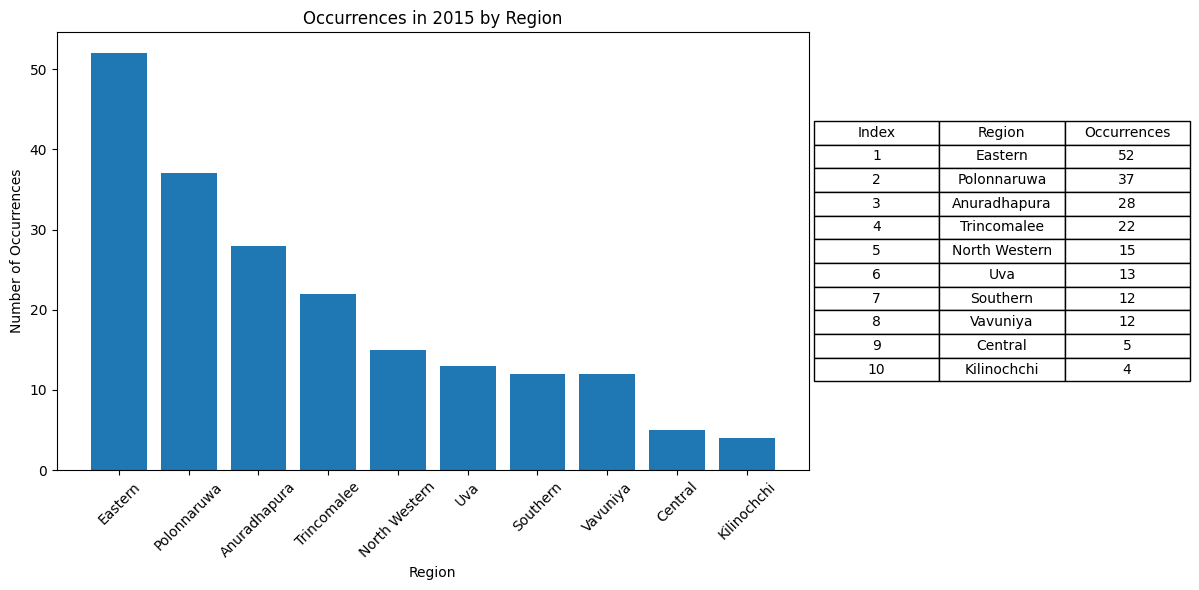

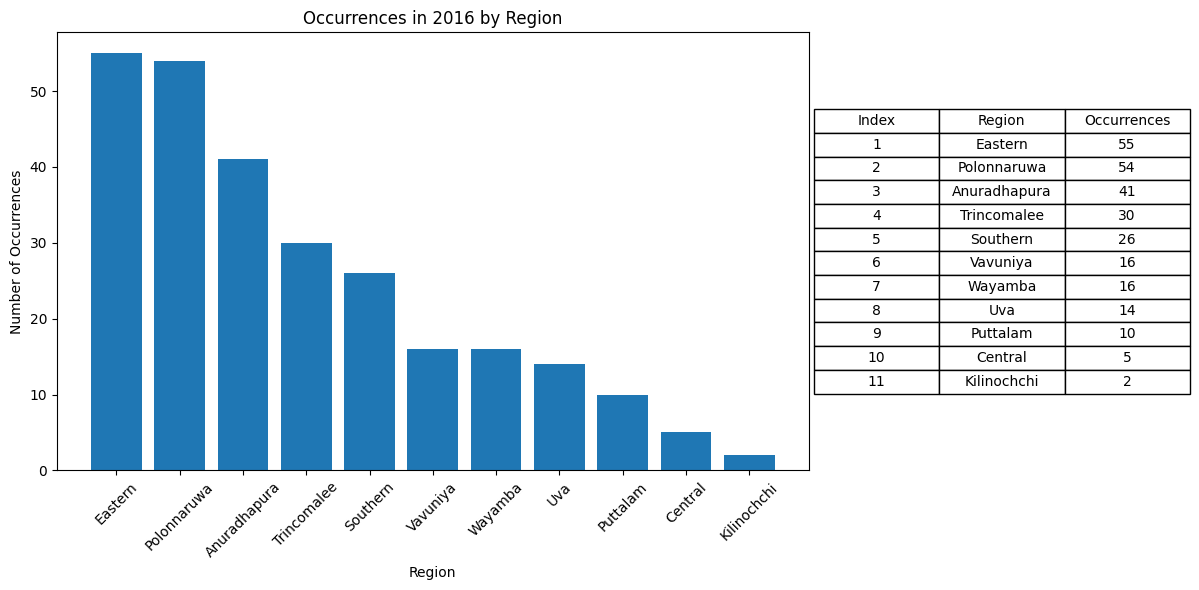

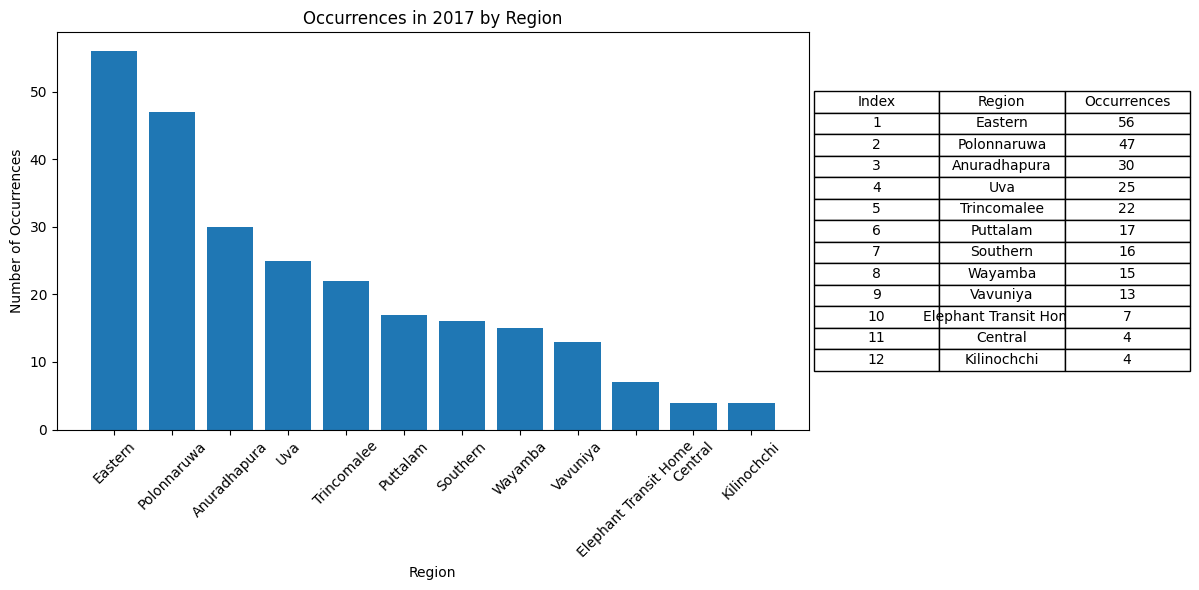

In [37]:
# Set 'Region' as index
regions_df = Regions_df.set_index('Region', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out regions with occurrence 0 for the current year
    data_to_plot = regions_df[regions_df[year] > 0]
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the bar plot in the first cell of the grid
    plt.subplot(gs[0])
    descending_Region = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_Region.index, descending_Region)
    plt.xlabel('Region')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Region')
    plt.xticks(rotation=45)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    top_regions = data_to_plot[year].nlargest(len(data_to_plot))  # Get regions in ascending order
    table_data = [['Index', 'Region', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_regions.index, top_regions))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [38]:
Regions_df = Regions_df.transpose().reset_index()

# Set the first row as column headers
Regions_df.columns = Regions_df.iloc[0]

# Drop the first row
Regions_df = Regions_df[1:]

In [39]:
Regions_df

0 Region Polonnaruwa North Western Eastern Southern YalaBundala Central  \
1   2010          74            66      42       35           8       2   
2   2011           0            82      33       36          11       3   
3   2012          72            63      44       29           4       5   
4   2013          63            18      29       18           0       7   
5   2014          57            14      49       40           0       8   
6   2015          37            15      52       12           0       5   
7   2016          54             0      55       26           0       5   
8   2017          47             0      56       16           0       4   

0 Mahaweli Anuradhapura Uva Vavuniya Kilinochchi Trincomalee Wayamba Puttalam  \
1        0            0   0        0           0           0       0        0   
2       90            0   0        0           0           0       0        0   
3        0           19  14        0           0           0       0        0   
4        0           49  22        0           0           0       0        0   
5        0           32  16       10           5           0       0        0   
6        0           28  13       12           4          22       0        0   
7        0           41  14       16           2          30      16       10   
8        0           30  25       13           4          22      15       17   

0 Elephant Transit Home  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     7

<Figure size 1000x600 with 0 Axes>

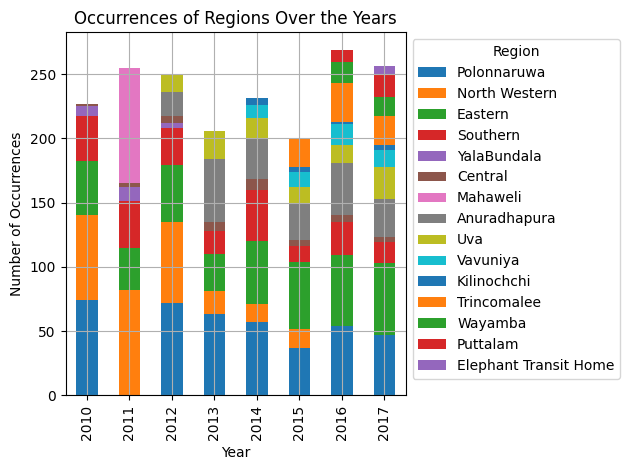

In [40]:
import matplotlib.pyplot as plt
# Set 'Year' as index
Regions_df.set_index('Region', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = Regions_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Regions Over the Years')

# Move the legend outside the plot to the right
ax.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## District

In [41]:
# Create a dictionary to store District counts for each year
District_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    District_count = df['District'].value_counts().to_dict()
    District_counts[year] = District_count

# Create a DataFrame to store the District counts
District_df = pd.DataFrame(District_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
District_df = District_df.fillna(0)

# Convert the values to integers
District_df = District_df.astype(int)

# Reset the index and rename the index column to 'Year'
District_df = District_df.reset_index().rename(columns={'index': 'District'})

In [42]:
District_df

District  2010  2011  2012  2013  2014  2015  2016  2017
0   Anuradhapura    36    43    29    39    27    30    44    33
1         Ampara    34    23    33    22    39    36    37    34
2    Polonnaruwa    33    43    25    32    24    32    44    43
3    Trincomalee    28    34    30    31    21    13    30    21
4     Monaragala    26    18    27    23    25    20    29    29
5     Hambantota    17    15    12    12    15     5     5    10
6     Kurunegala    10    15    17    12    10    10    13    12
7         Matale     7     6     3     0     7     6    10     5
8         Mannar     7     4     6     2    10     2     8     5
9        Badulla     7     6     5     2     5     6     6    12
10    Batticaloa     7    11    14     4    13    13    17    12
11      Puttalam     6    12    17     6     7     5    10    18
12     Ratnapura     3    16    11     7    16     0     4     3
13      Vavuniya     3     6    13     7     2     8     7     8
14       Unknown     2     0     3     0     0     9     0     7
15         Kandy     1     1     2     4     1     1     2     0
16   Kilinochchi     0     1     0     0     0     0     1     1
17    Mullaitivu     0     1     1     1     5     4     2     3
18   Nuwaraeliya     0     0     2     2     4     0     0     0

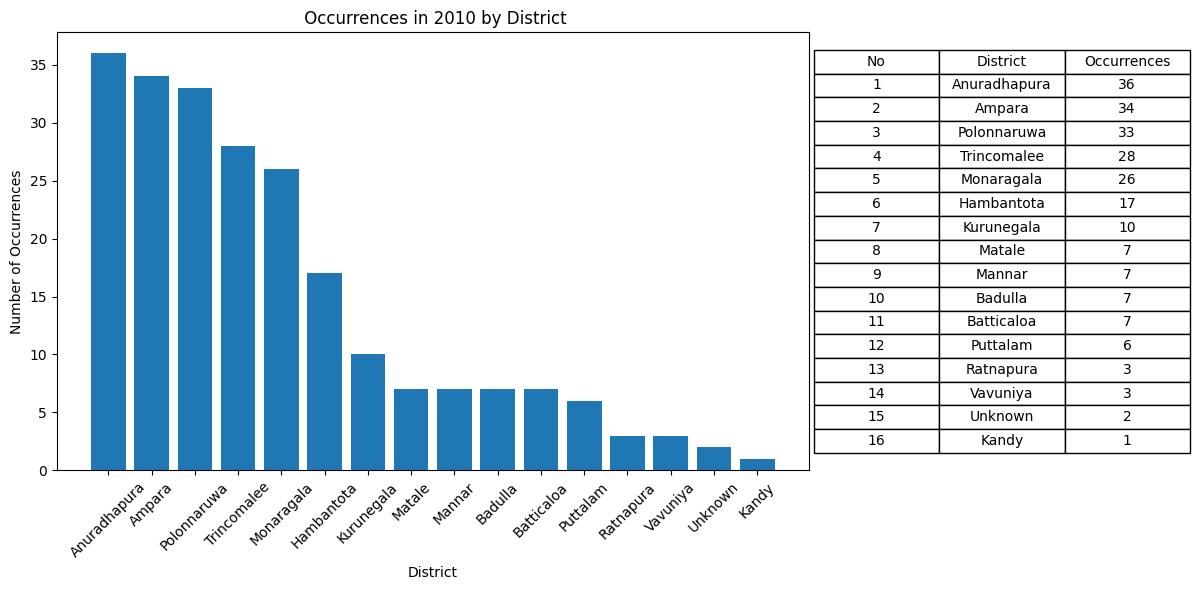

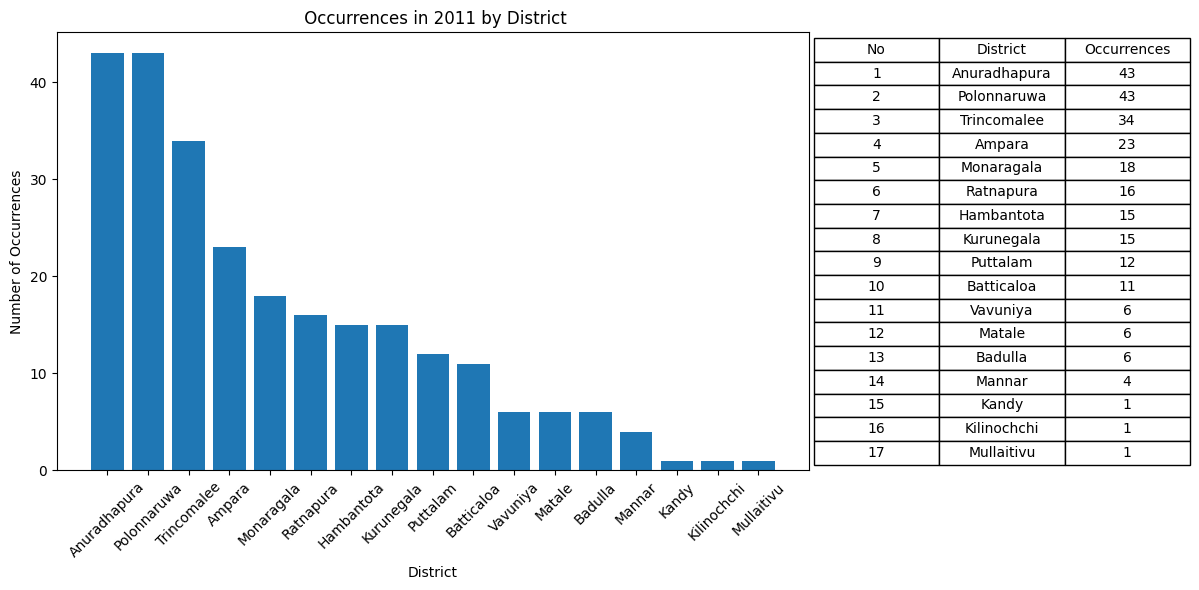

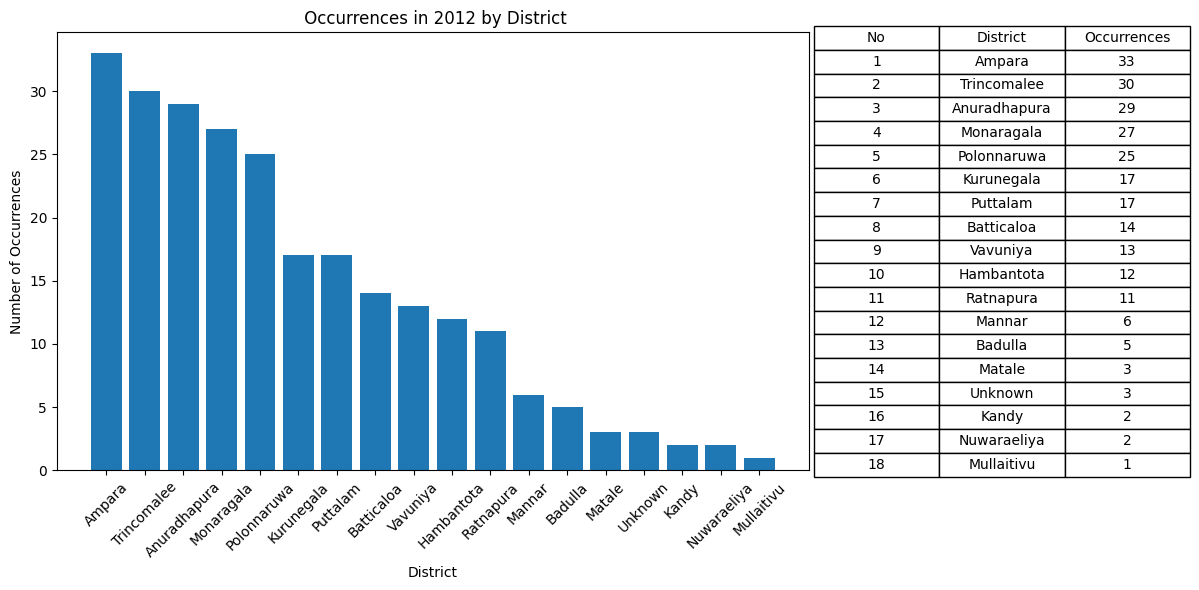

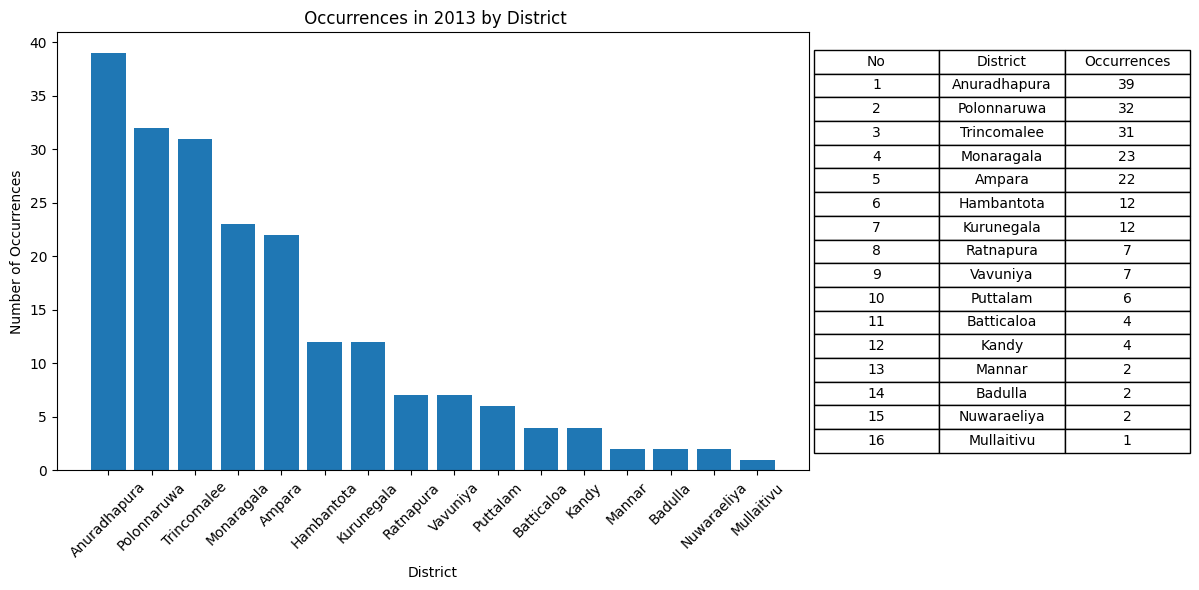

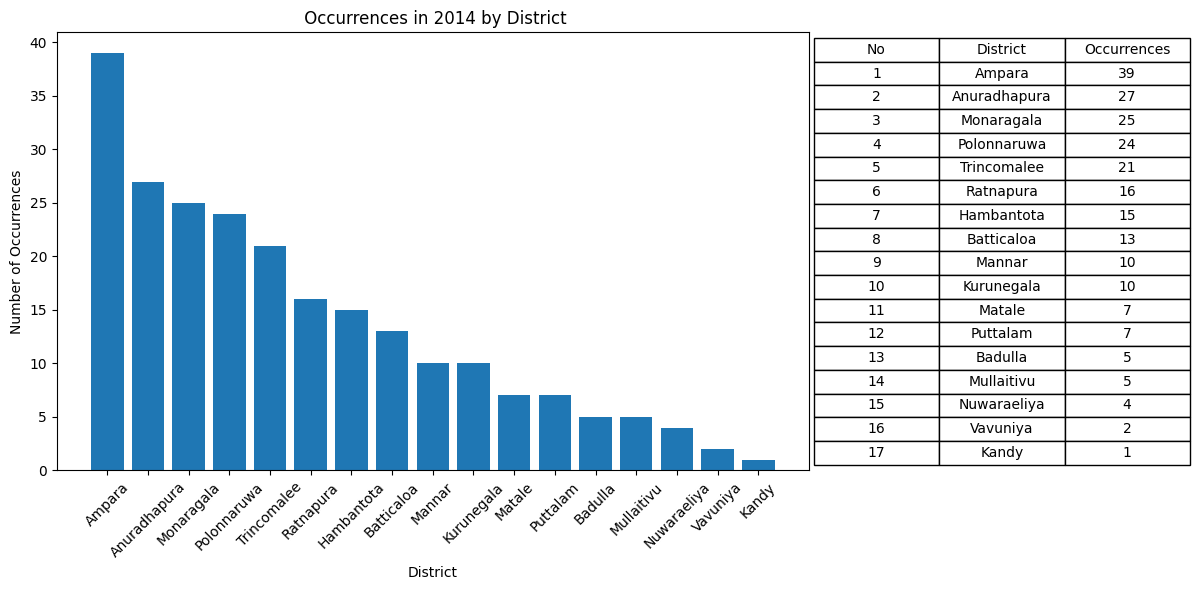

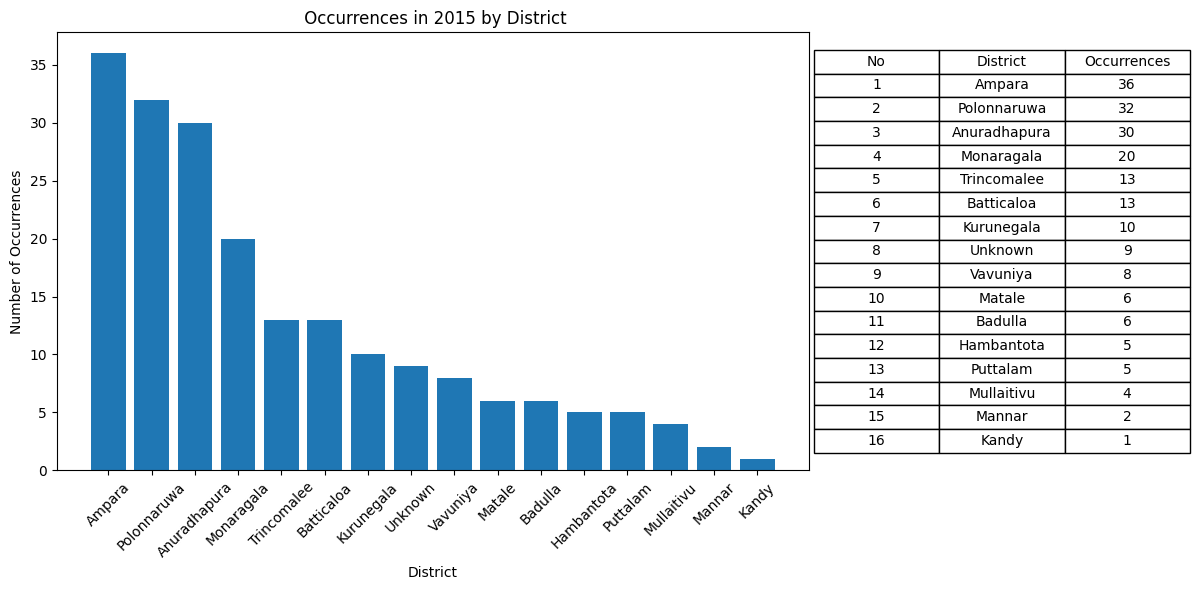

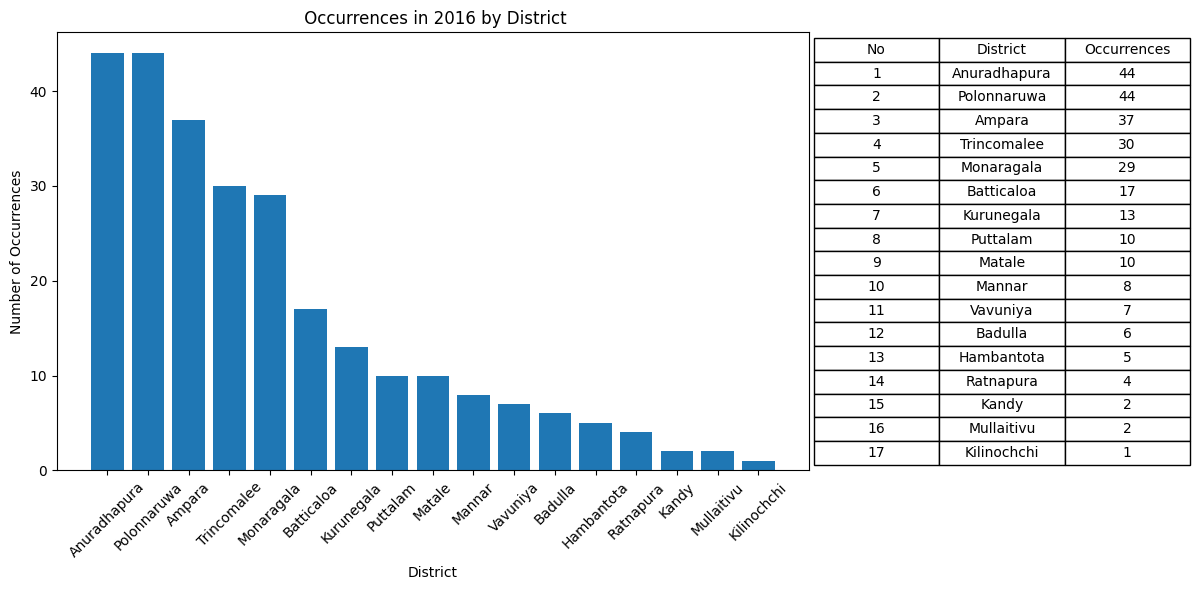

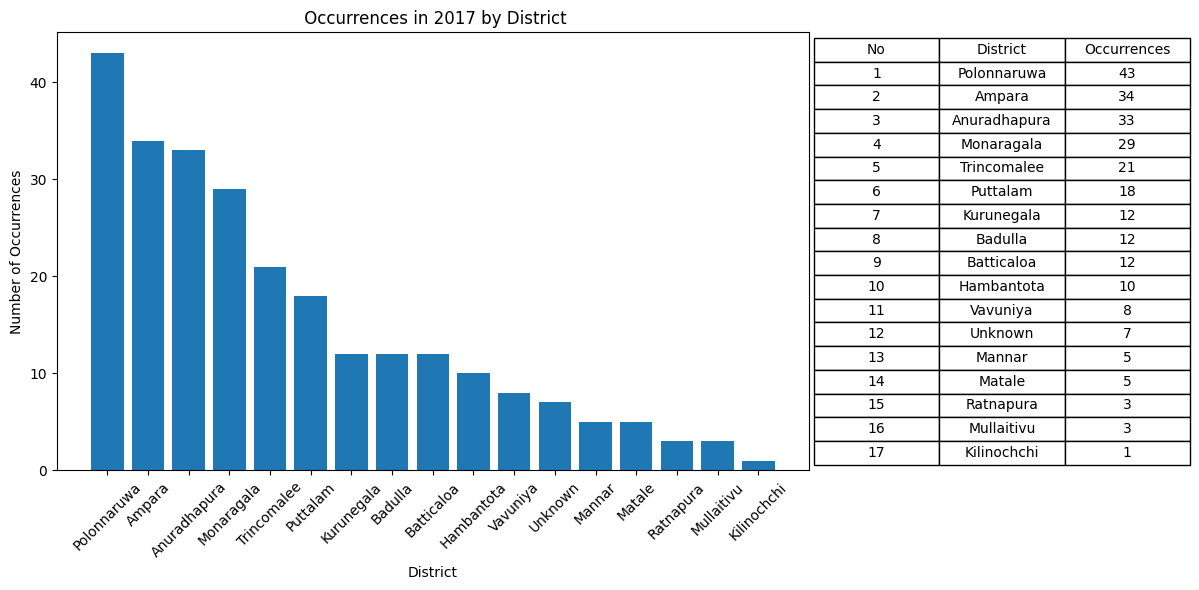

In [43]:
# Set 'District' as index
districts_df = District_df.set_index('District', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out districts with occurrence 0 for the current year
    data_to_plot = districts_df[districts_df[year] > 0]
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the descending bar plot in the second cell of the grid

    plt.subplot(gs[0])
    descending_districts = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_districts.index, descending_districts)
    plt.xlabel('District')
    plt.ylabel('Number of Occurrences')
    plt.title(f' Occurrences in {year} by District')
    plt.xticks(rotation=45)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    top_districts = data_to_plot[year].nlargest(len(data_to_plot))  # Get districts in ascending order
    table_data = [['No', 'District', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_districts.index, top_districts))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [44]:
District_df = District_df.transpose().reset_index()

# Set the first row as column headers
District_df.columns = District_df.iloc[0]

# Drop the first row
District_df = District_df[1:]

<Figure size 3000x1800 with 0 Axes>

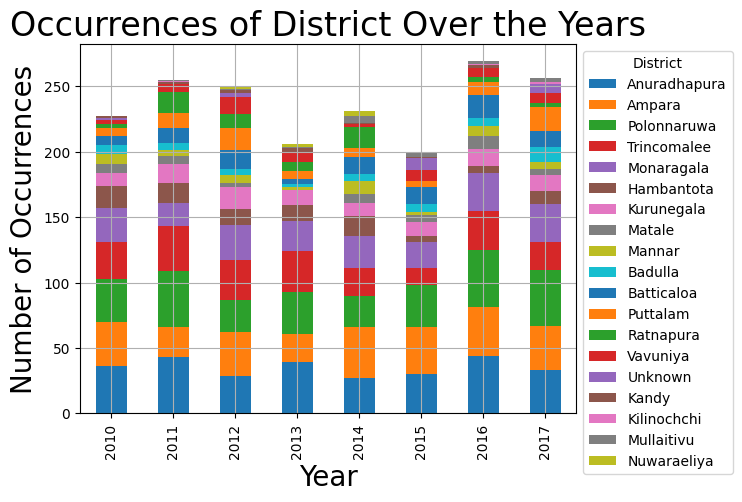

In [45]:
# Set 'District' as index
District_df.set_index('District', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = District_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of District Over the Years', fontsize=24)

# Move the legend outside the plot to the right
ax.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## D/S Office

In [46]:
# Create a dictionary to store D/S Office counts for each year
DS_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    DS_count = df['D/S Office'].value_counts().to_dict()
    DS_counts[year] = DS_count

# Create a DataFrame to store the region counts
DS_df = pd.DataFrame(DS_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
DS_df = DS_df.fillna(0)

# Convert the values to integers
DS_df = DS_df.astype(int)

# Reset the index and rename the index column to 'Year'
DS_df = DS_df.reset_index().rename(columns={'index': 'D/S Office'})

In [47]:
DS_df

D/S Office  2010  2011  2012  2013  2014  2015  2016  2017
0           Hinguraggoda    16    10     7     6     3     0     0     0
1           Thanamalvila    11     7     4     3    10     6     0     0
2               Kanthale    10     9     6     8     3     1     4     5
3            Hambanthota     8     0     5     0    11     1     0     0
4               Morawewa     7     9     8     5     3     3     9     2
..                   ...   ...   ...   ...   ...   ...   ...   ...   ...
247           Nedunkanar     0     0     0     0     0     0     0     1
248  Nagara Ha Kadavatha     0     0     0     0     0     0     0     1
249             Siripura     0     0     0     0     0     0     0     1
250             Seruvila     0     0     0     0     0     0     0     1
251                Mutur     0     0     0     0     0     0     0     1

[252 rows x 9 columns]

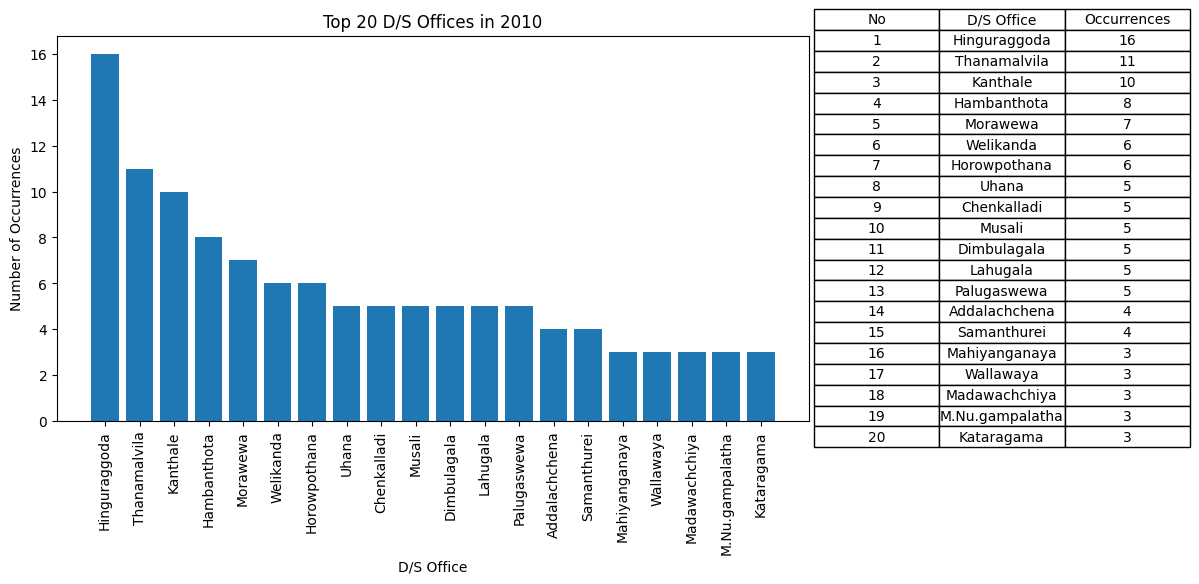

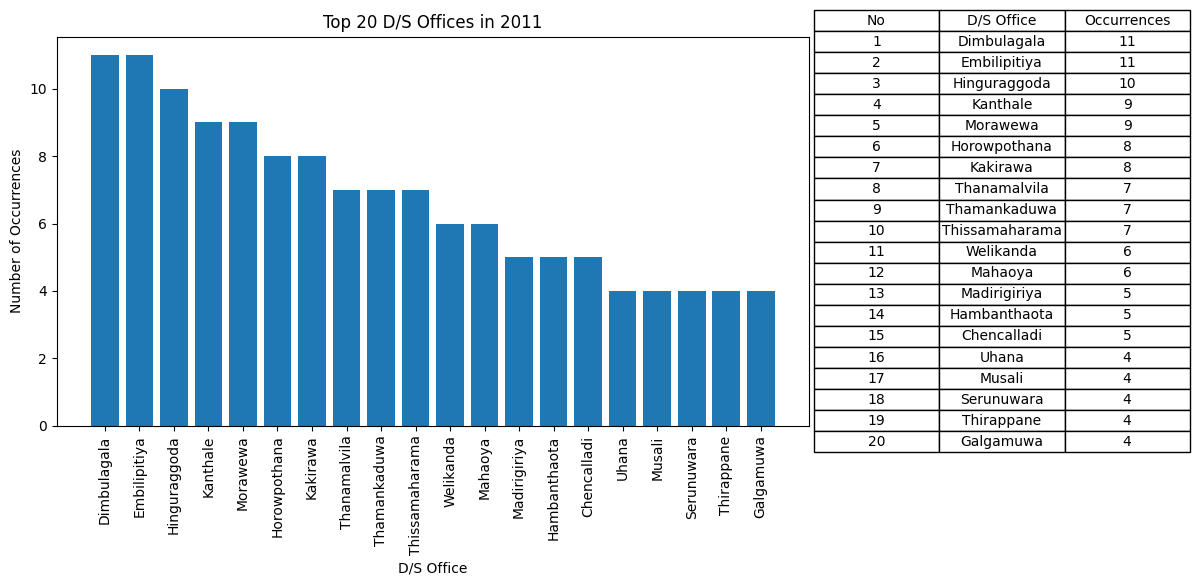

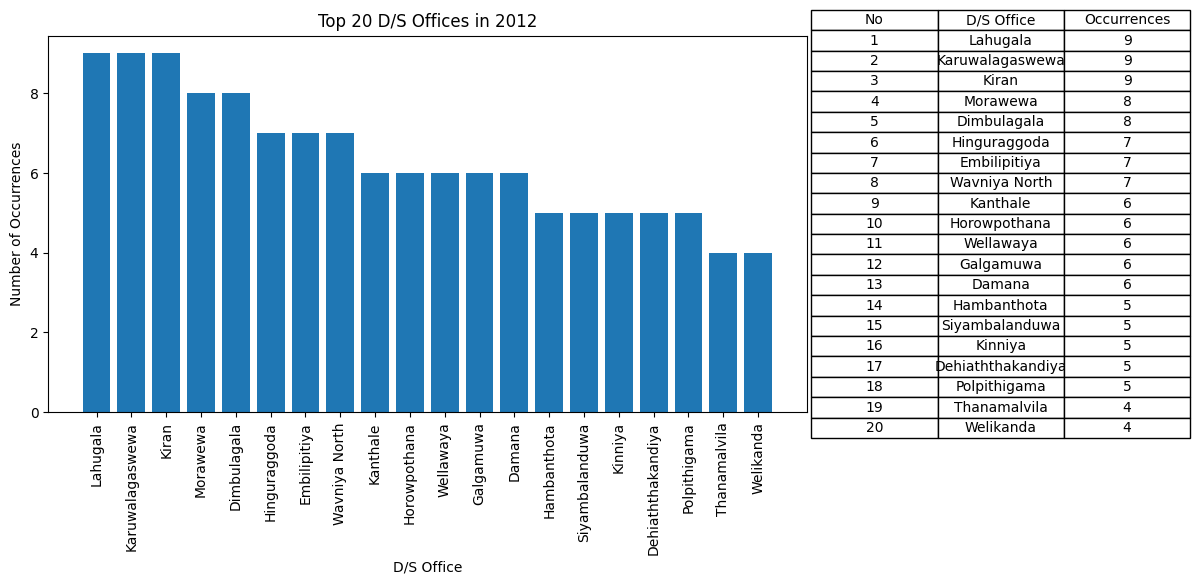

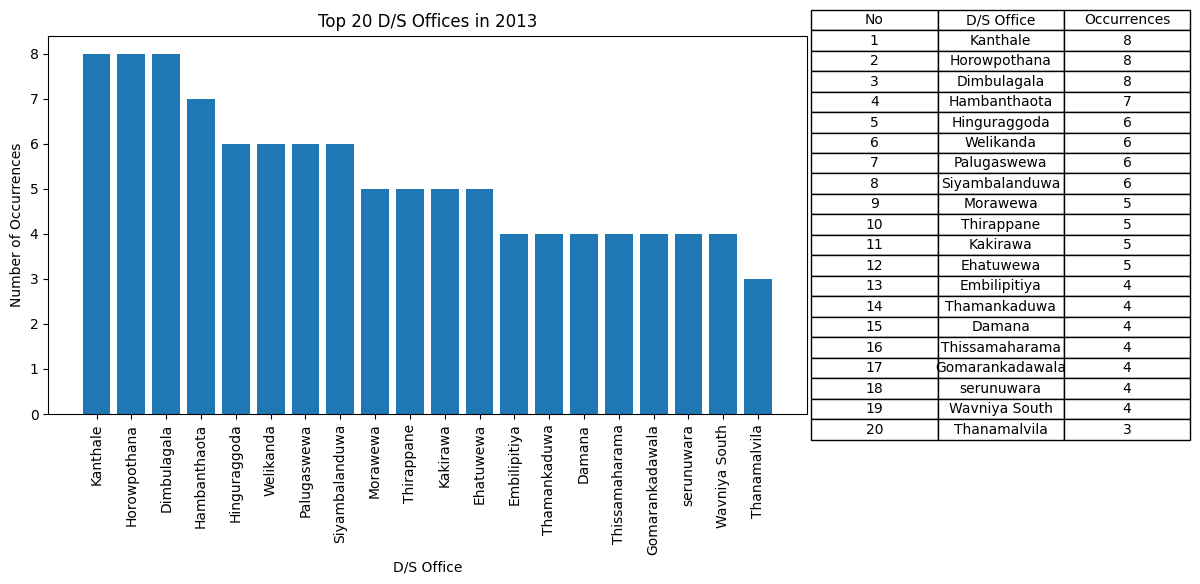

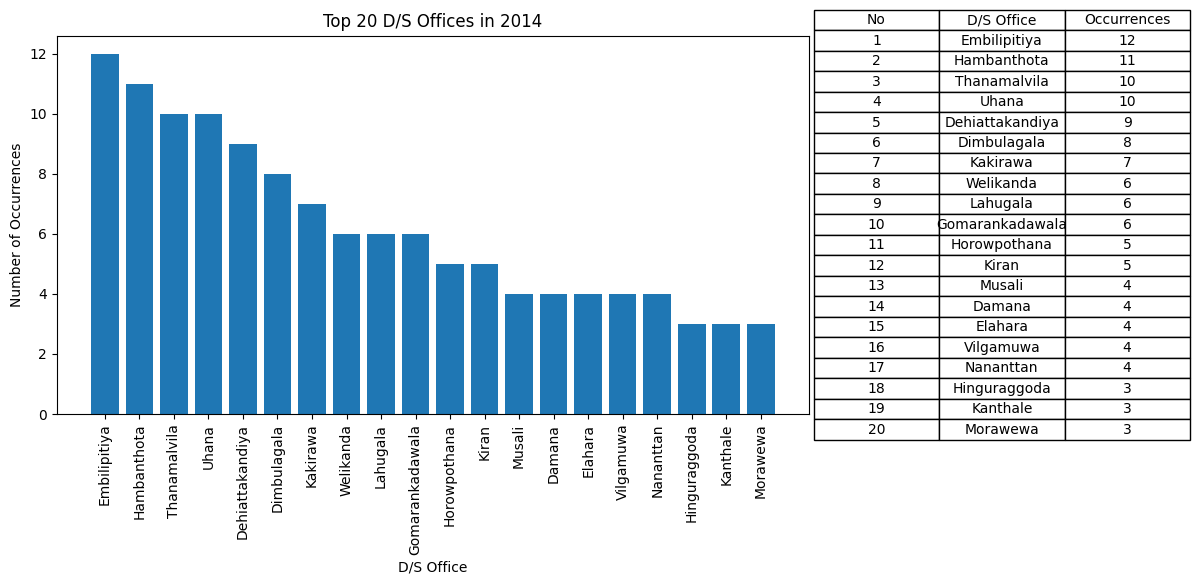

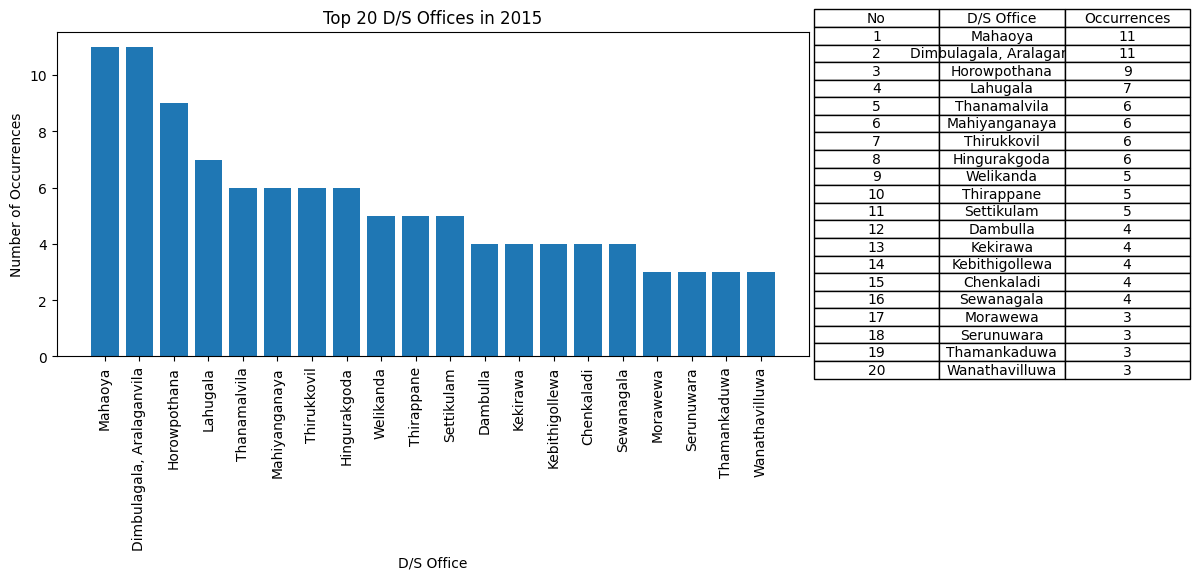

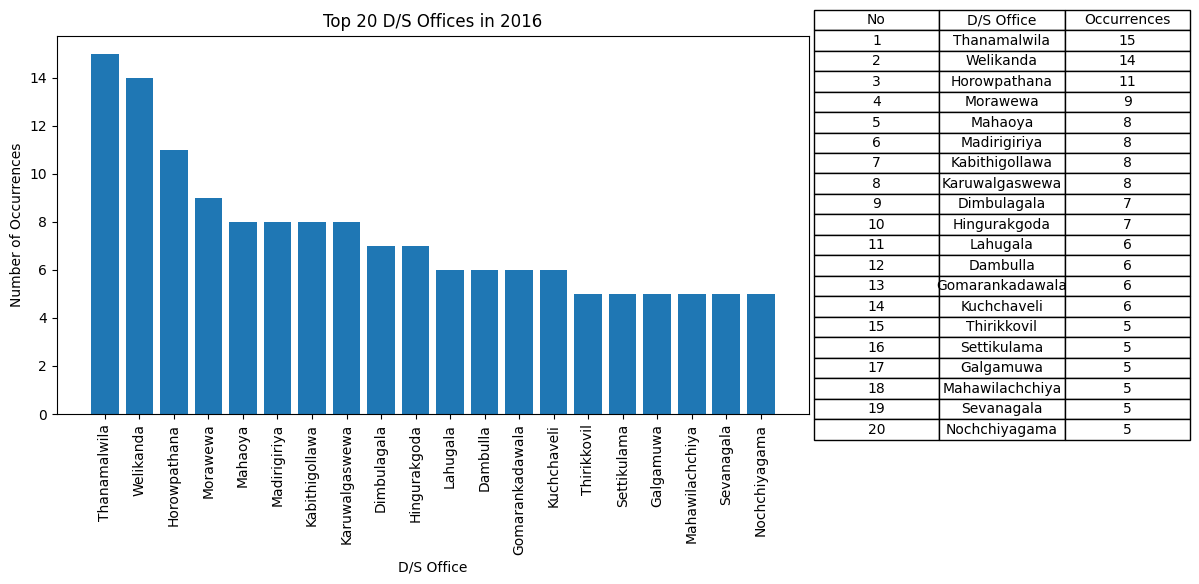

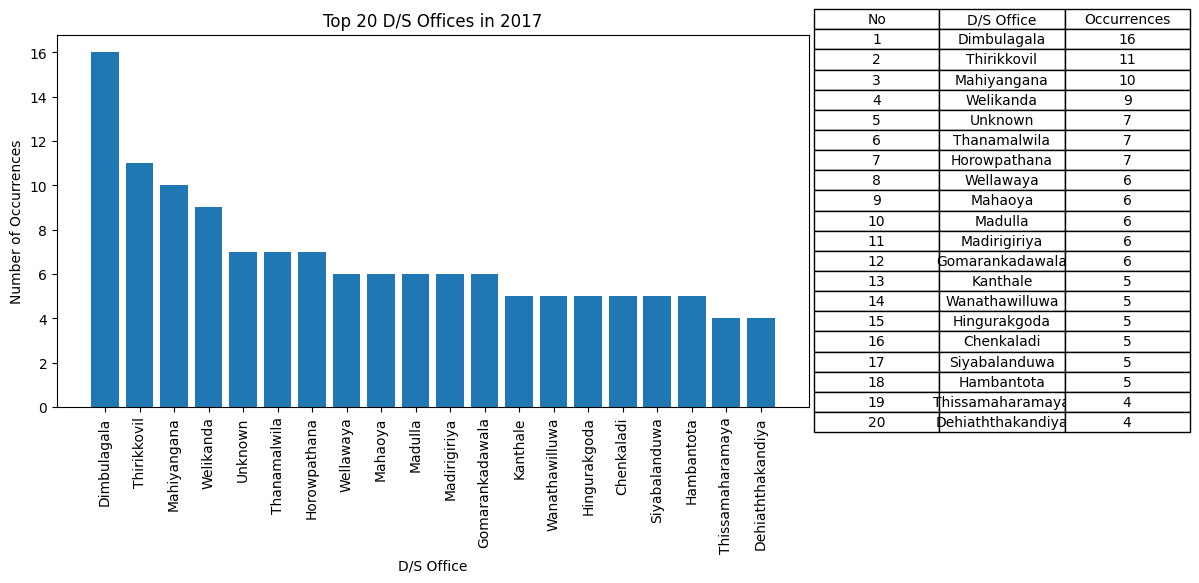

In [48]:
# Set 'D/S Office' as index
ds = DS_df.set_index('D/S Office', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Number of top D/S Offices to show
top_n = 20

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter out D/S Offices with occurrence 0 for the current year
    data_to_plot = ds[ds[year] > 0]
    
    # Get the top N D/S Offices in ascending order
    top_ds_offices = data_to_plot[year].nlargest(top_n)
    
    # Create a grid with 1 row and 2 columns for the plot and table
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the bar plot in the first cell of the grid
    plt.subplot(gs[0])
    plt.bar(top_ds_offices.index, top_ds_offices)
    plt.xlabel('D/S Office')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Top {top_n} D/S Offices in {year}')
    plt.xticks(rotation=90)
    
    # Create the table as a separate subplot in the second cell of the grid
    table_ax = plt.subplot(gs[1])
    table_data = [['No', 'D/S Office', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(top_ds_offices.index, top_ds_offices))]
    col_labels = table_data.pop(0)
    table = table_ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)  # Adjust the table size
    table_ax.axis('off')

    plt.tight_layout()
    plt.show()


In [49]:
DS_df = DS_df.transpose().reset_index()

# Set the first row as column headers
DS_df.columns = DS_df.iloc[0]

# Drop the first row
DS_df = DS_df[1:]

<Figure size 3000x1800 with 0 Axes>

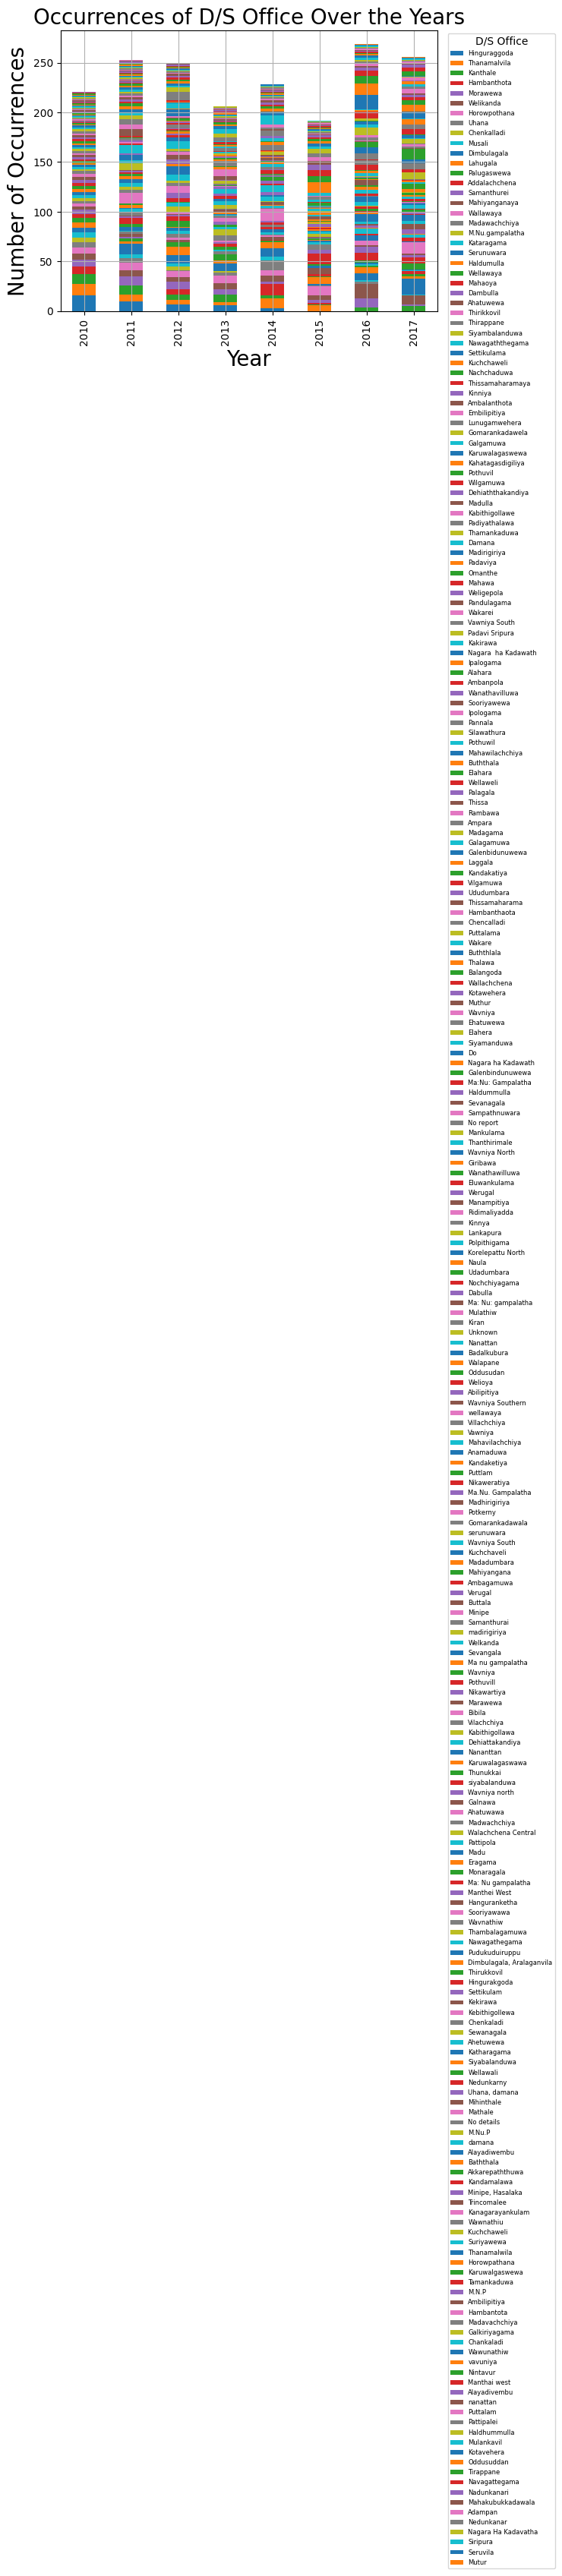

In [50]:
# Set 'D/S Office' as index
DS_df.set_index('D/S Office', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = DS_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of D/S Office Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='D/S Office', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=6)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Cause of Death

In [51]:
# Create a dictionary to store Cause of Death counts for each year
COD_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    COD_count = df['Cause of Death'].value_counts().to_dict()
    COD_counts[year] = COD_count

# Create a DataFrame to store the Cause of Death counts
COD_df = pd.DataFrame(COD_counts)

# Fill NaN values with 0 (if a region doesn't appear in a year's dataset)
COD_df = COD_df.fillna(0)

# Convert the values to integers
COD_df = COD_df.astype(int)

# Reset the index and rename the index column to 'Year'
COD_df = COD_df.reset_index().rename(columns={'index': 'Cause of Death'})

In [52]:
COD_df

Cause of Death  2010  2011  2012  2013  2014  2015  2016  2017
0                 Gunshot    84    55    45    34    47    43    42    53
1                 Unknown    48    73    78    53    53    42    65    44
2            Electrocuted    18    18    21    26    12    20    29    25
3                Accident    18    12    17    10    10     3     3     4
4                   Other    17    10    11     9     6     0     8     6
5              Hakkapatas    11    33    36    34    41    50    41    53
6                 Poisned     9    16     8     7     9     8     7     7
7          Body destroyed     7     4     0     5    11     0     8     5
8          Train Accident     7    12    10     7     0    12    12     7
9                 Natural     4     9    11    11    25    12     5    10
10             Septicemia     2     0     2     3     1     1     3     1
11                Injured     1     3     4     5     4     6    12    10
12              Land mine     1     3     5     0     0     0     1     0
13                  Flood     0     6     0     0     0     0     0     0
14      Broken the Spinal     0     1     0     0     0     0     1     1
15                Drought     0     0     1     0     0     0     0     0
16             Nivukeniya     0     0     1     0     0     0     0     0
17      Severe hemorrhage     0     0     0     1     0     0     0     0
18            Liver floot     0     0     0     1     0     0     0     0
19         Train accident     0     0     0     0     9     0     0     0
20    Garbage consumption     0     0     0     0     1     0     0     0
21                At born     0     0     0     0     1     0     0     2
22                Drowned     0     0     0     0     1     0     3     2
23  Attack by an elephant     0     0     0     0     0     2     2     6
24       Fallen into well     0     0     0     0     0     1     5     9
25                Disease     0     0     0     0     0     0    16     5
26              Lightning     0     0     0     0     0     0     4     0
27        Eaten polythene     0     0     0     0     0     0     2     4
28  Falling of a mountain     0     0     0     0     0     0     0     2

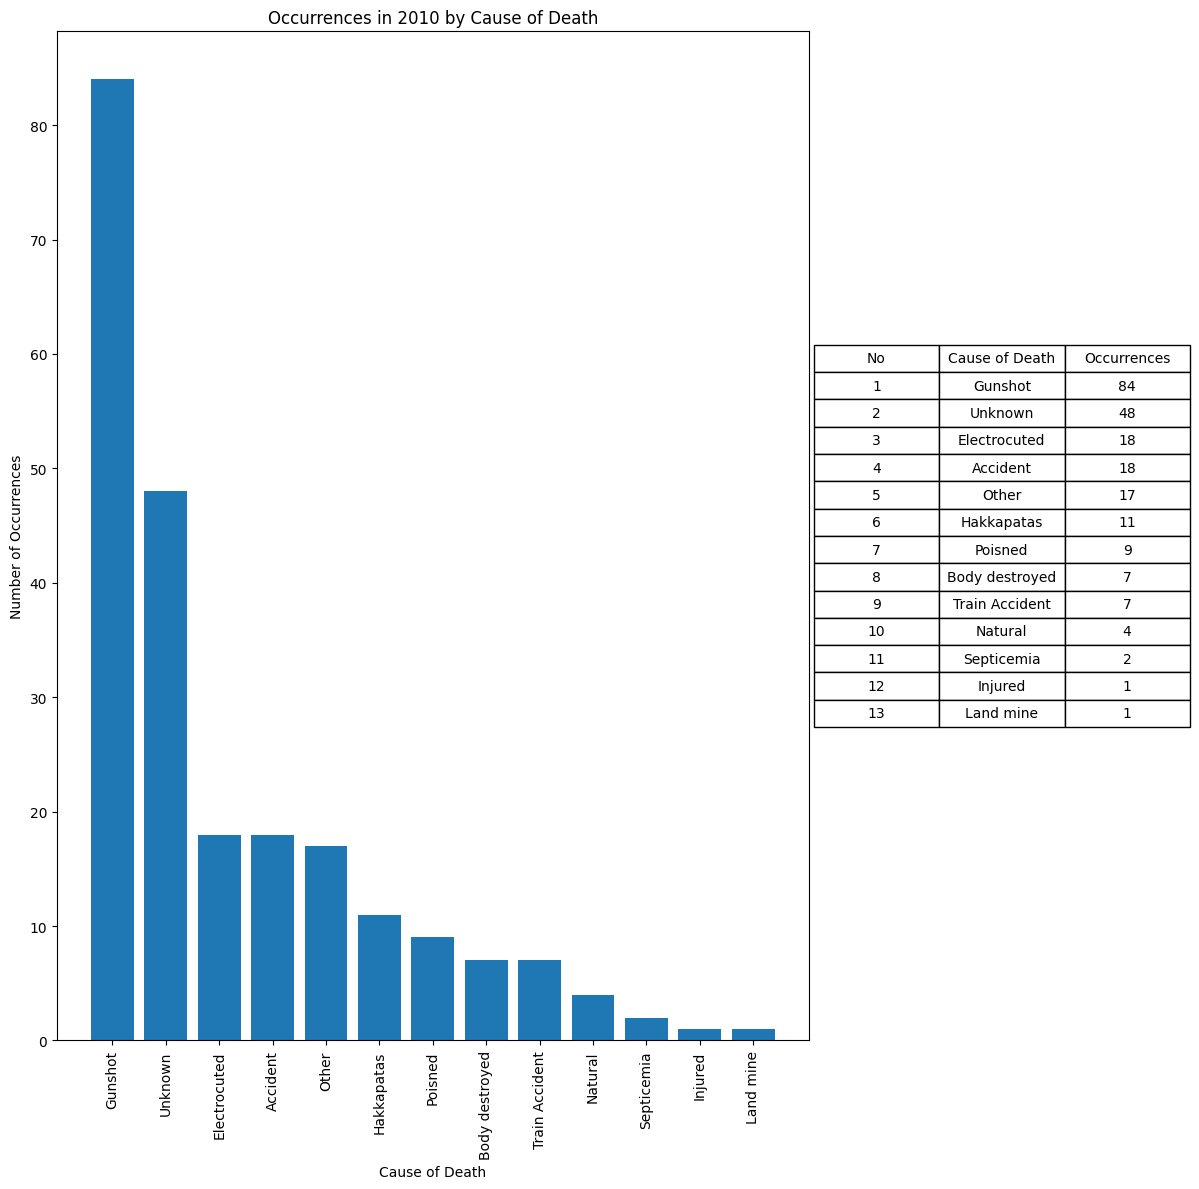

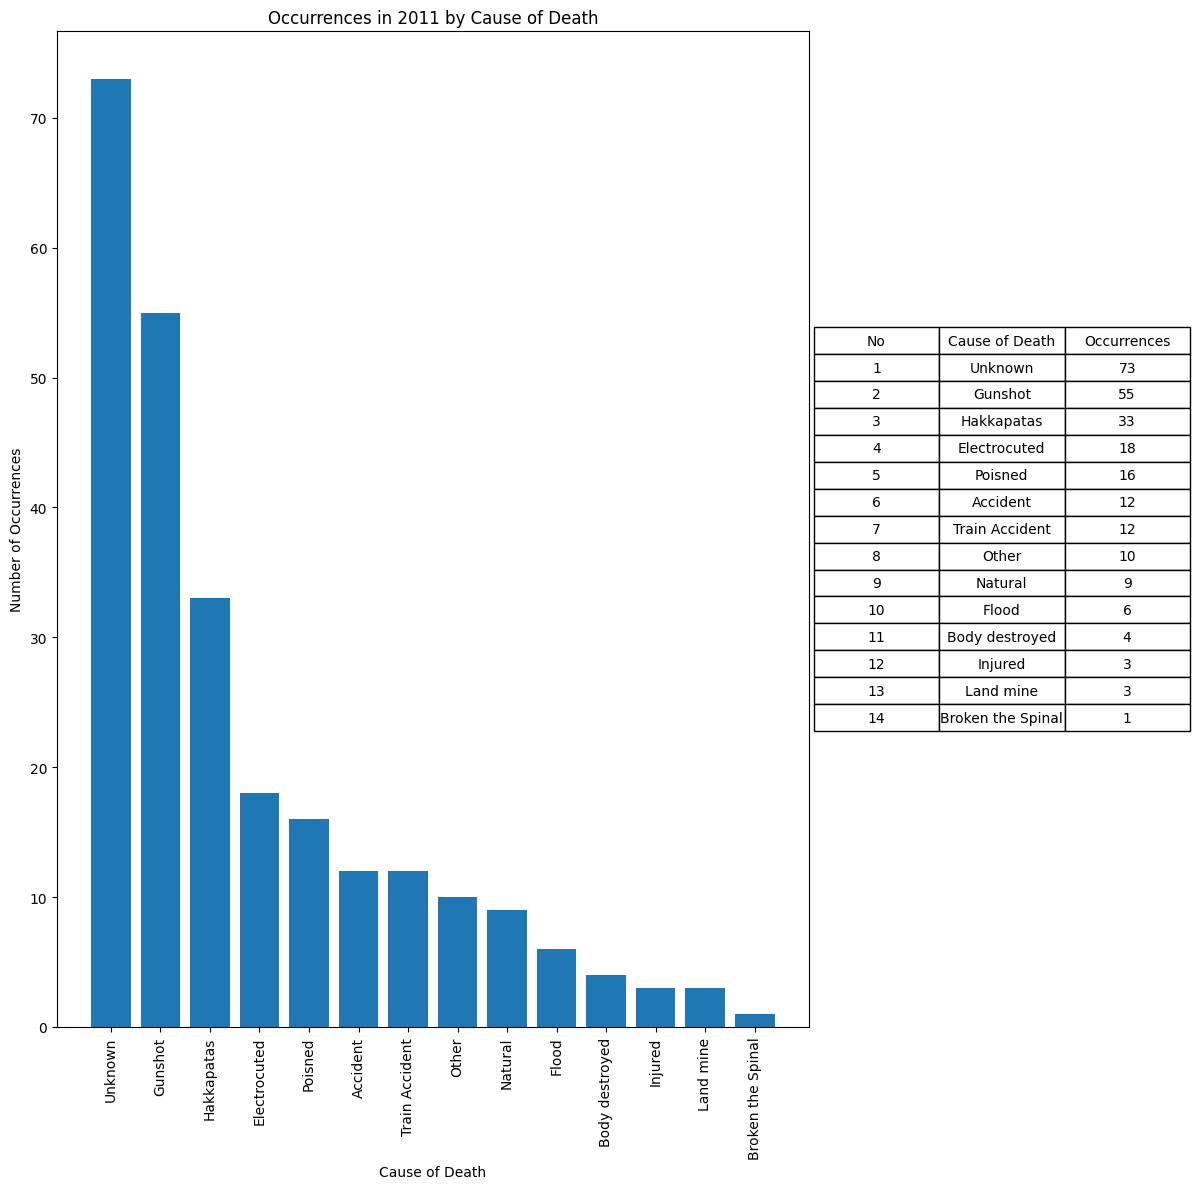

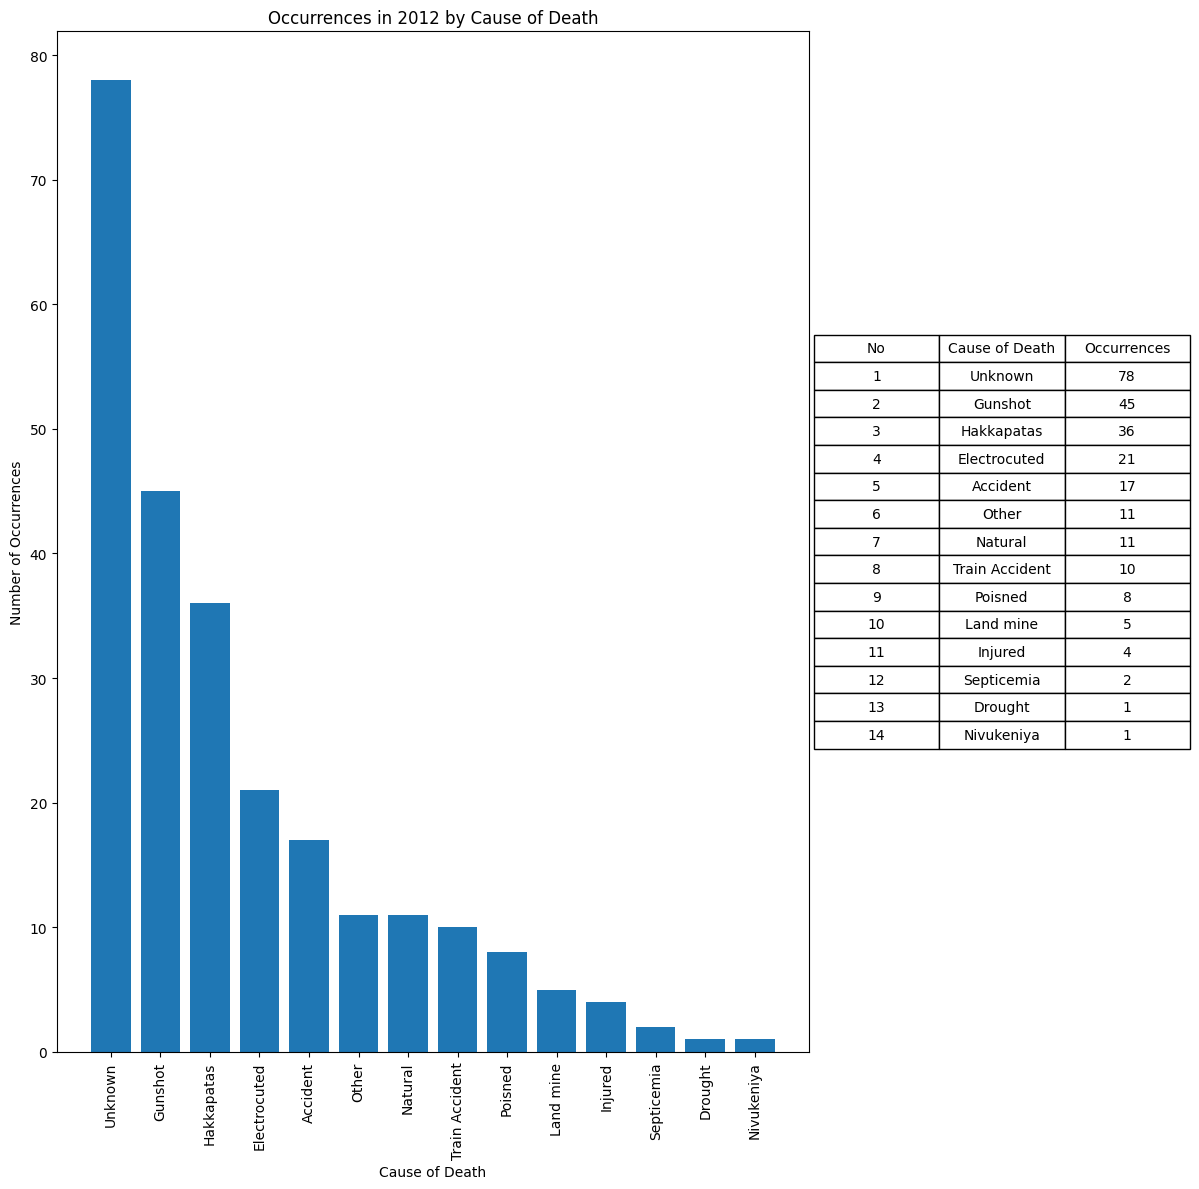

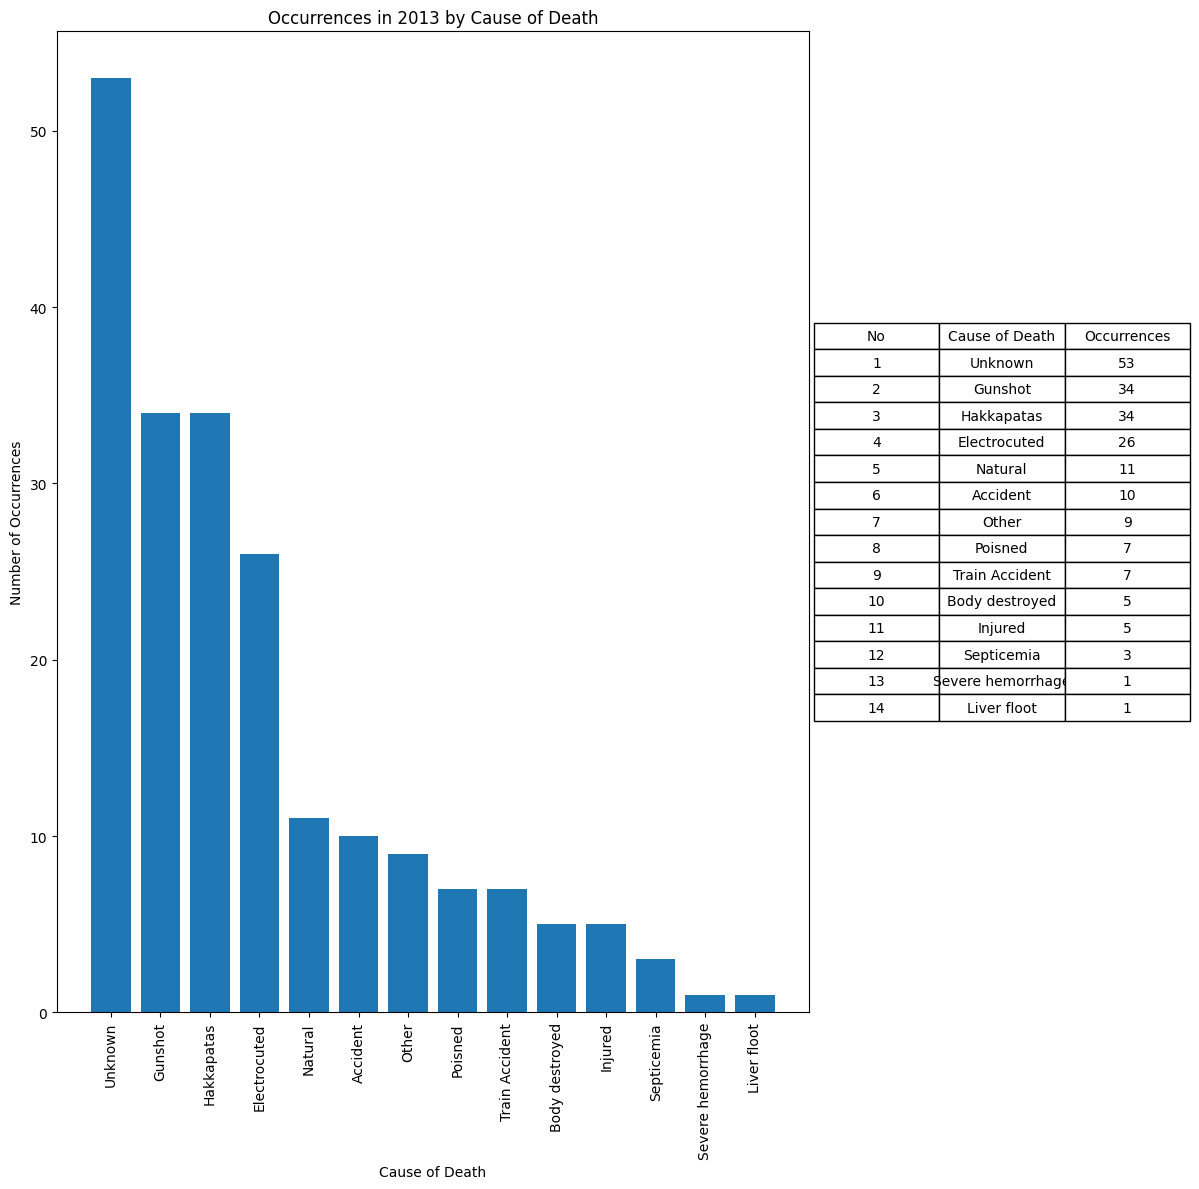

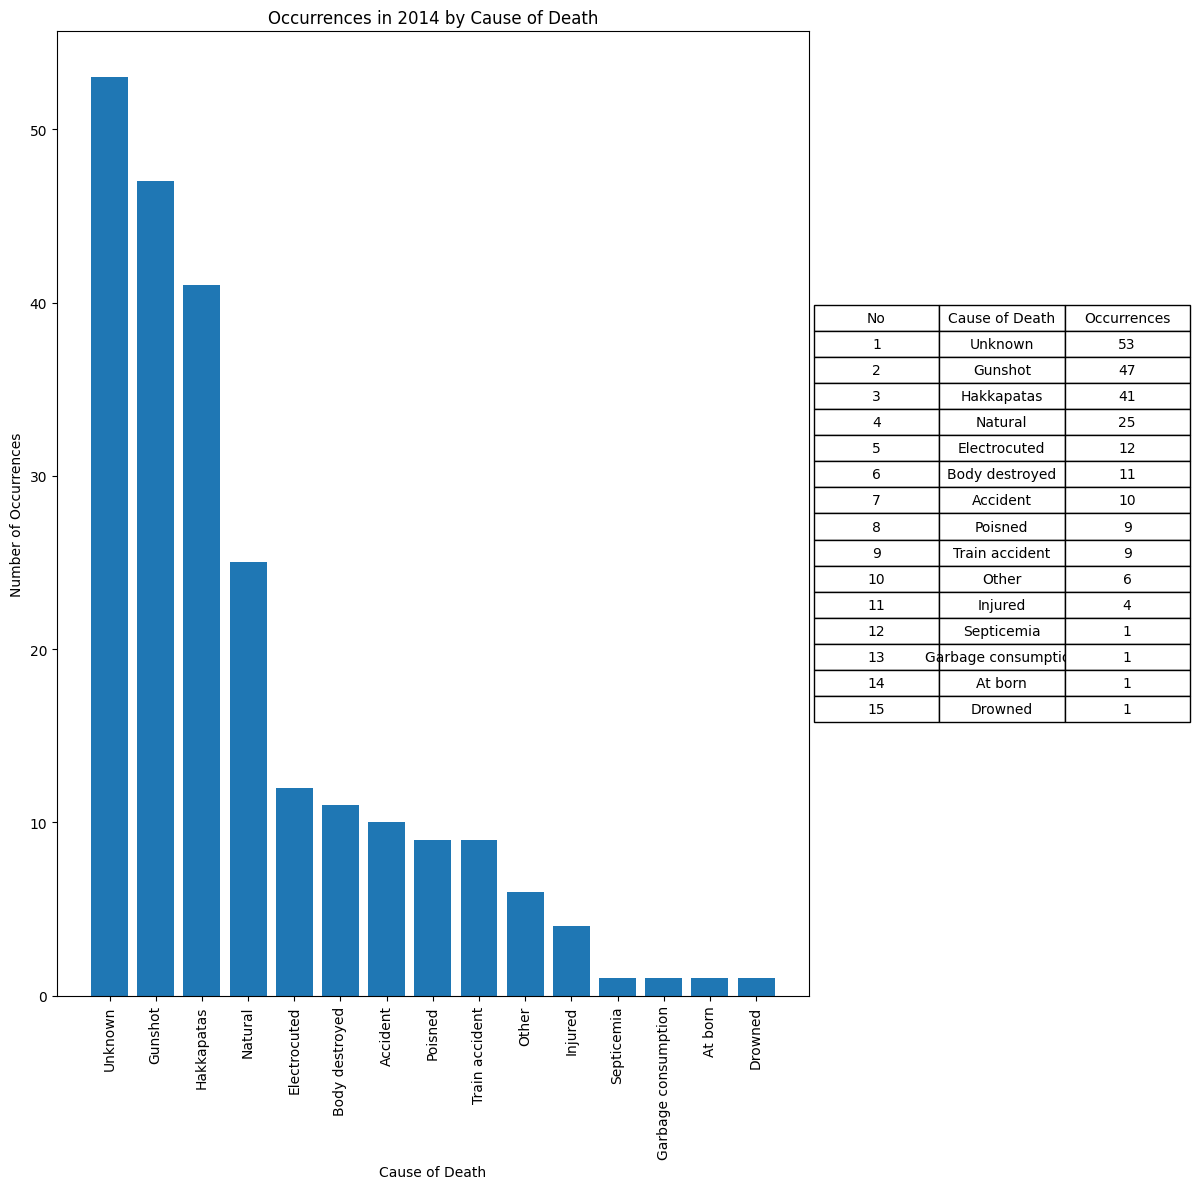

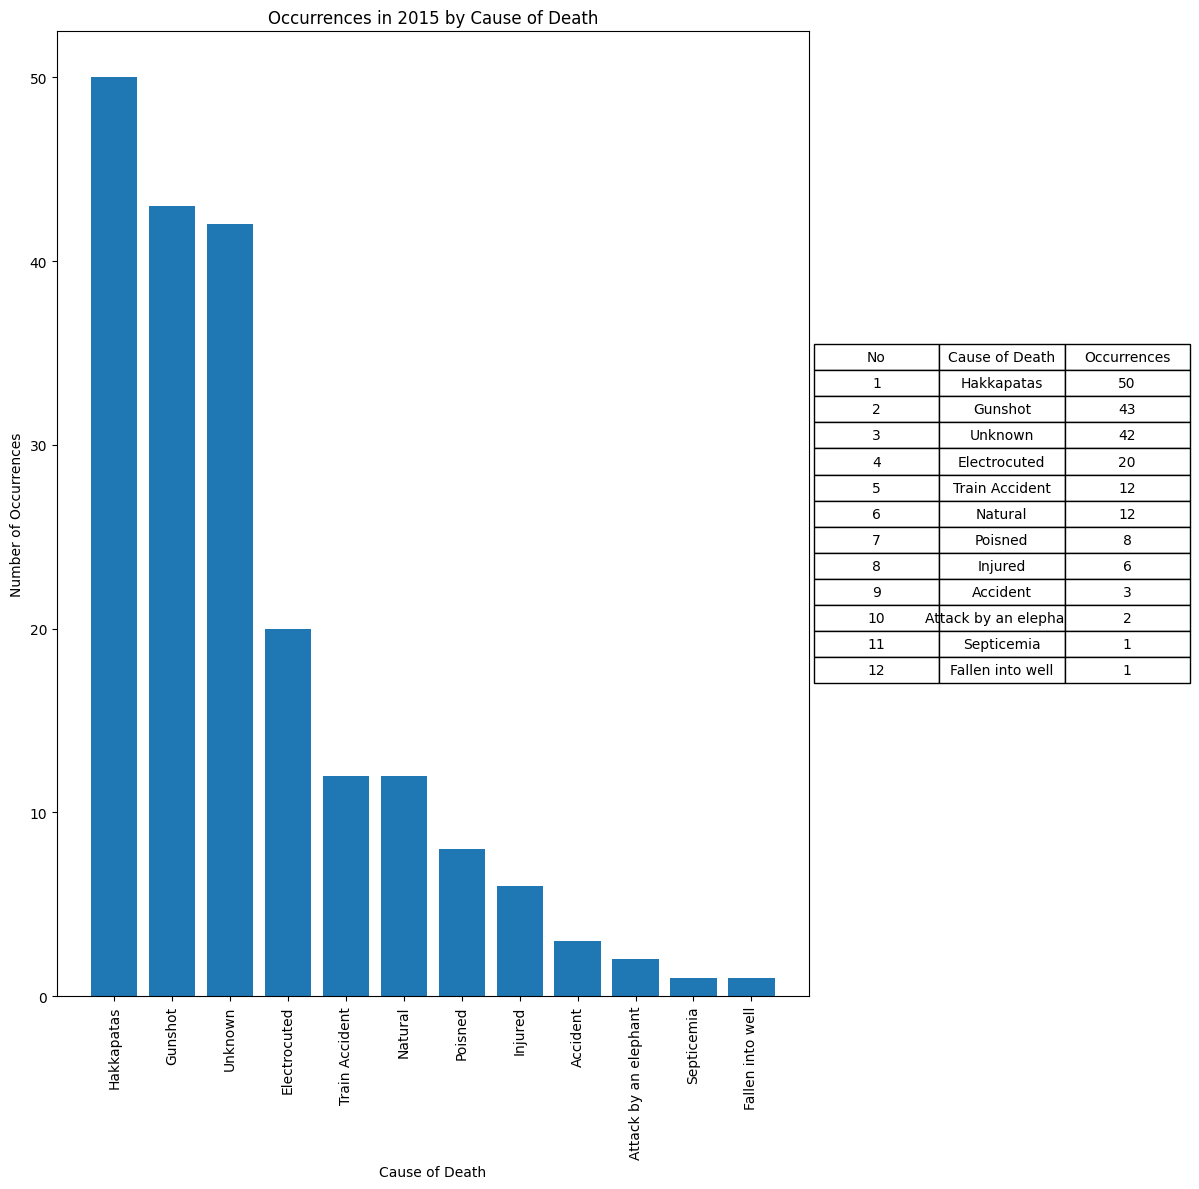

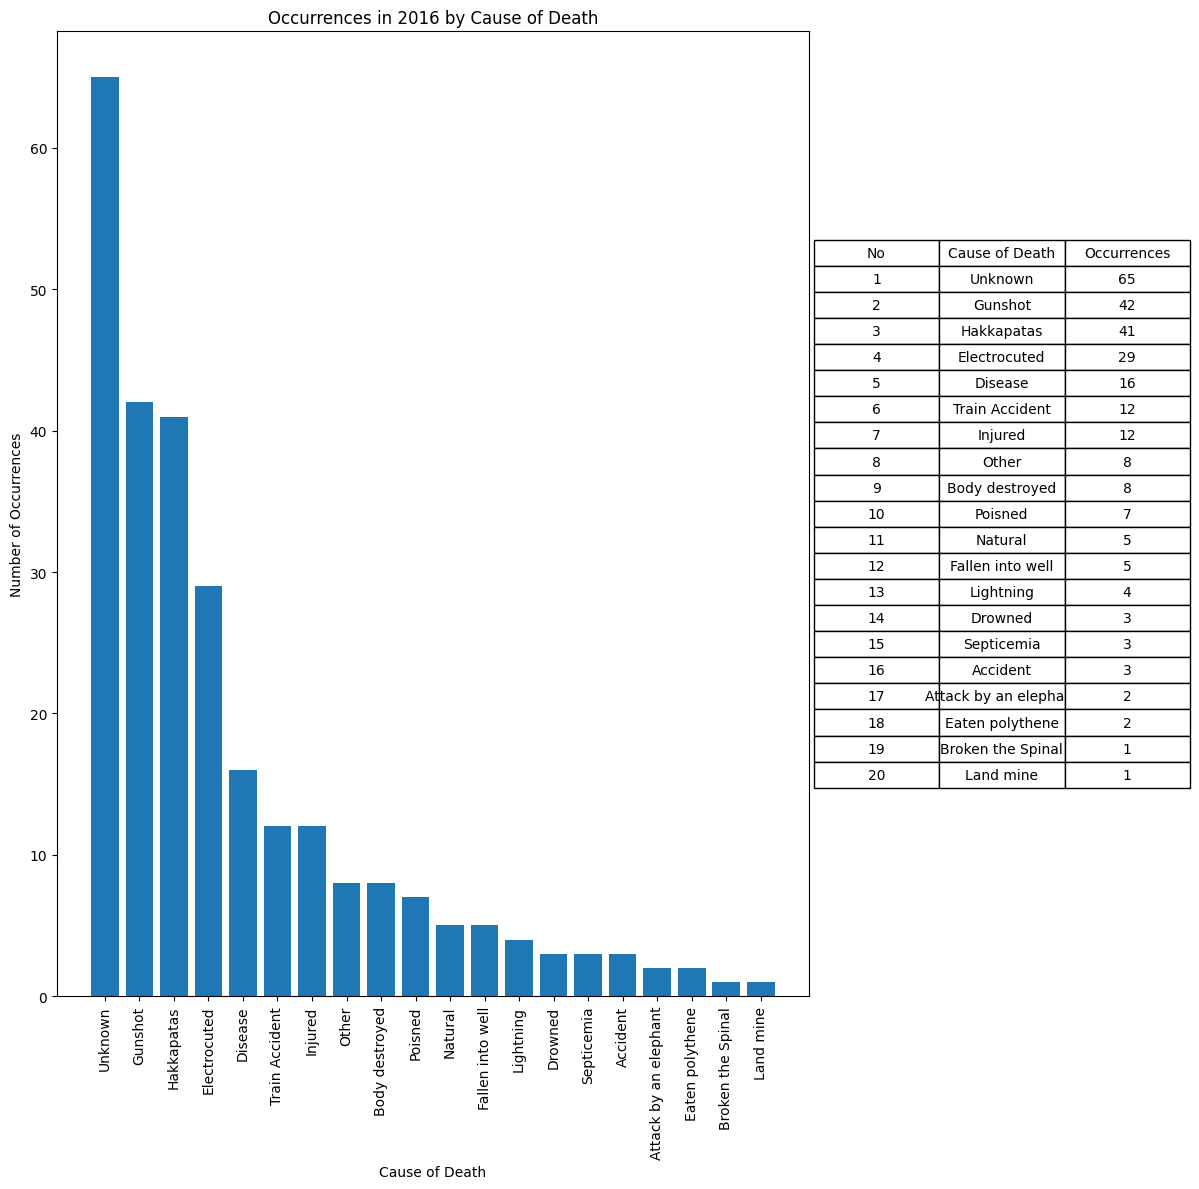

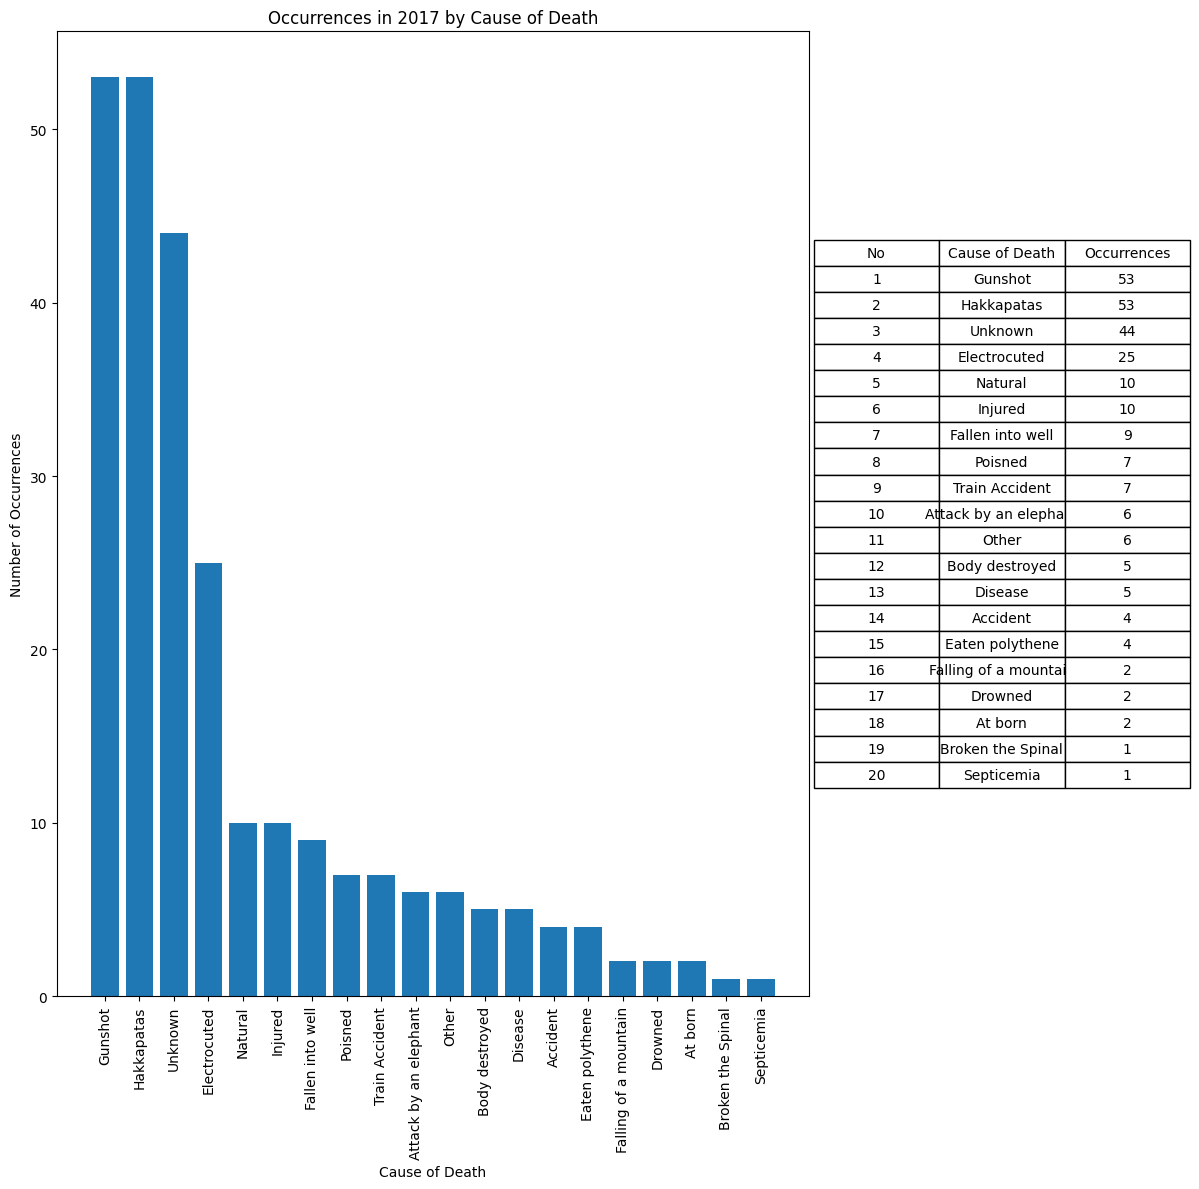

In [53]:
# Set 'Cause of Death' as index
causes_df = COD_df.set_index('Cause of Death', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = causes_df[causes_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Cause of Death')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Cause of Death')
    plt.xticks(rotation=90)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Cause of Death', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [24]:
COD_df = COD_df.transpose().reset_index()

# Set the first row as column headers
COD_df.columns = COD_df.iloc[0]

# Drop the first row
COD_df = COD_df[1:]

<Figure size 3000x1800 with 0 Axes>

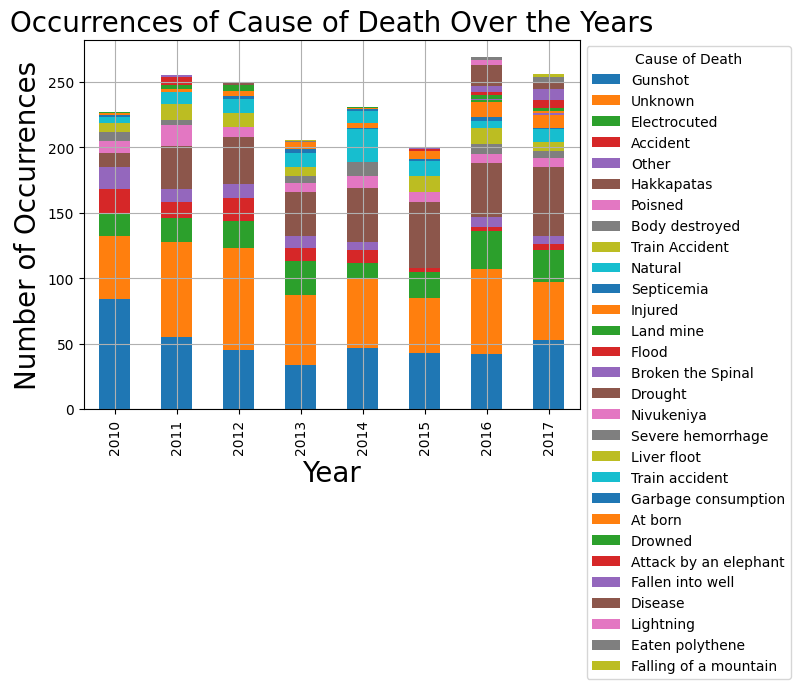

In [25]:
# Set 'D/S Office' as index
COD_df.set_index('Cause of Death', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = COD_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Cause of Death Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='Cause of Death', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Gender

In [26]:
# Create a dictionary to store Gender counts for each year
Sex_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    Sex_count = df['Sex'].value_counts().to_dict()
    Sex_counts[year] = Sex_count

# Create a DataFrame to store the Gender counts
Sex_df = pd.DataFrame(Sex_counts)

# Fill NaN values with 0 (if a Gender doesn't appear in a year's dataset)
Sex_df = Sex_df.fillna(0)

# Convert the values to integers
Sex_df = Sex_df.astype(int)

# Reset the index and rename the index column to 'Year'
Sex_df =Sex_df.reset_index().rename(columns={'index': 'Gender'})

In [27]:
Sex_df

Gender  2010  2011  2012  2013  2014  2015  2016  2017
0     Male   156   153   145   127   135   141   181   162
1   Female    50    72    85    68    68    41    73    70
2  Unknown    18    25    18    11    28    18    15    22
3     Calf     3     5     2     0     0     0     0     2

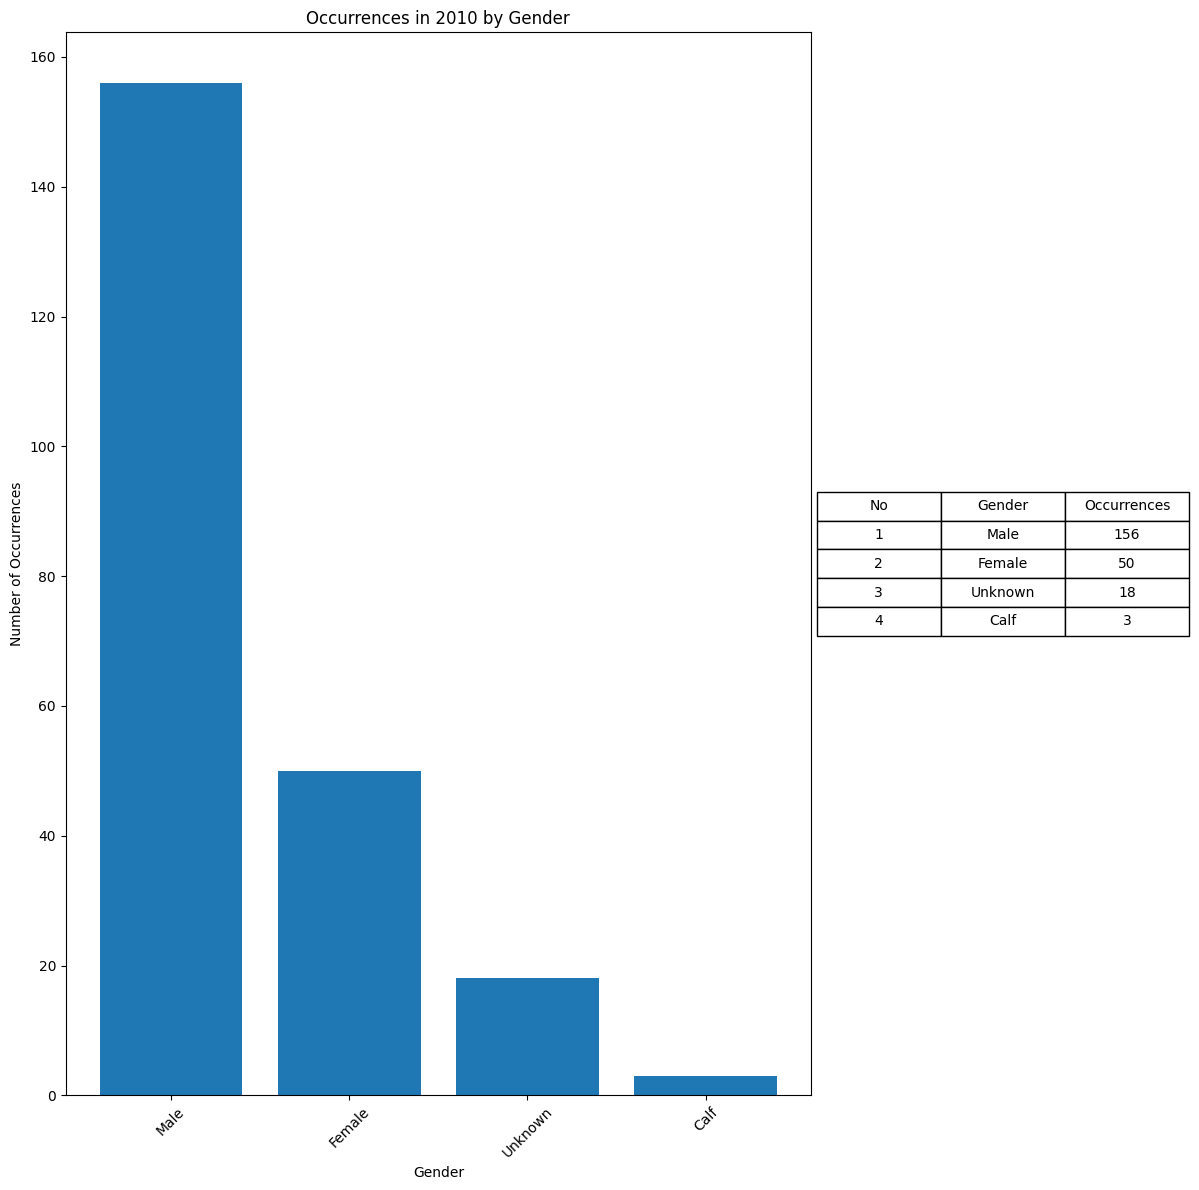

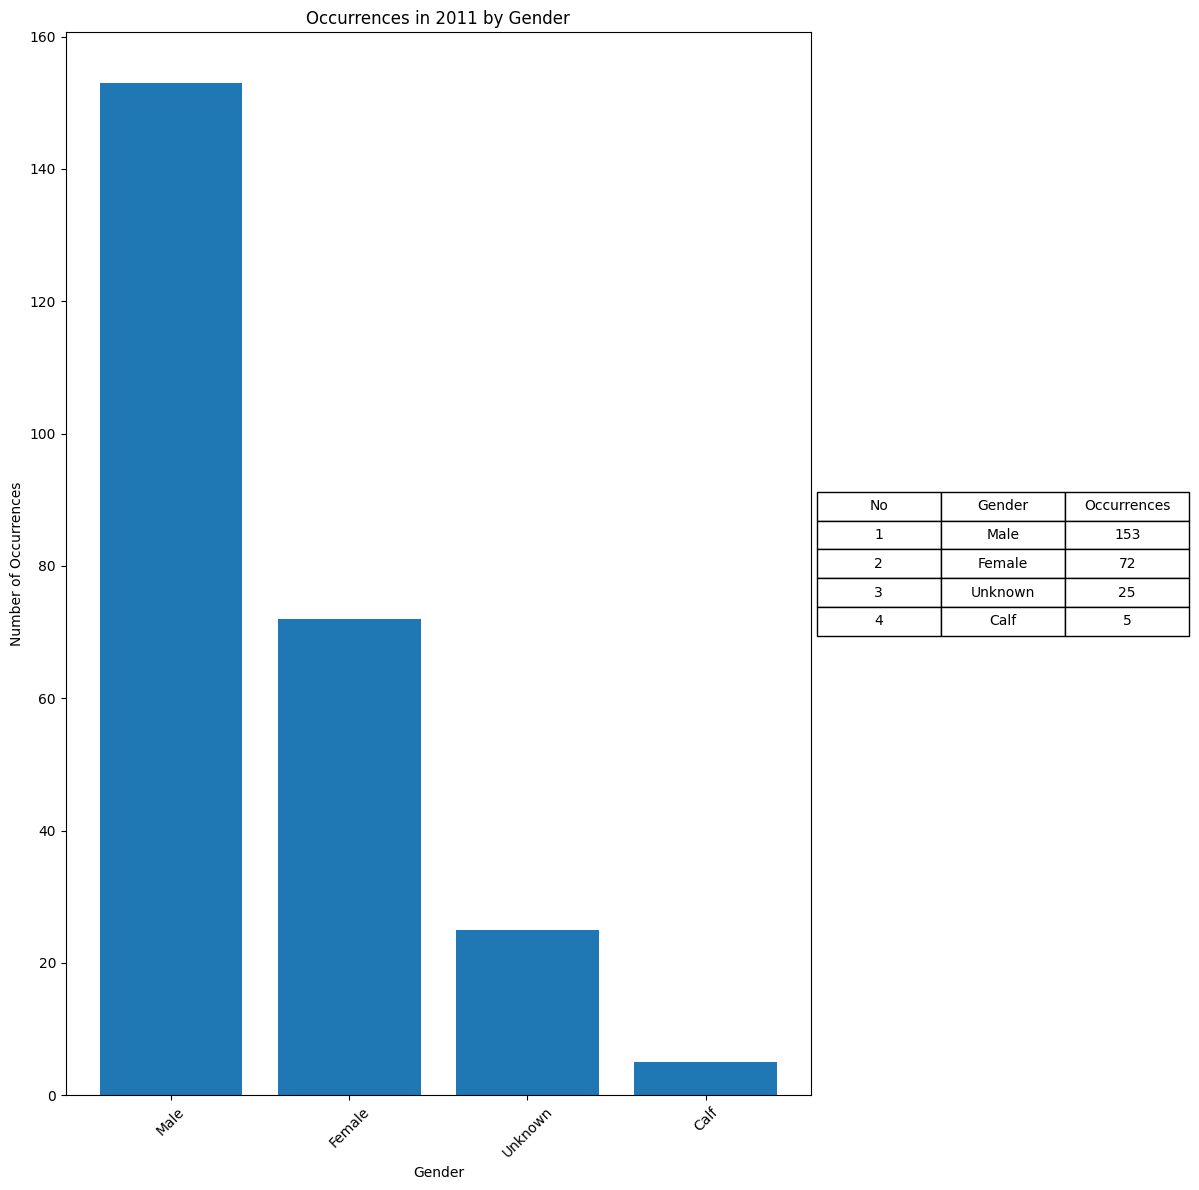

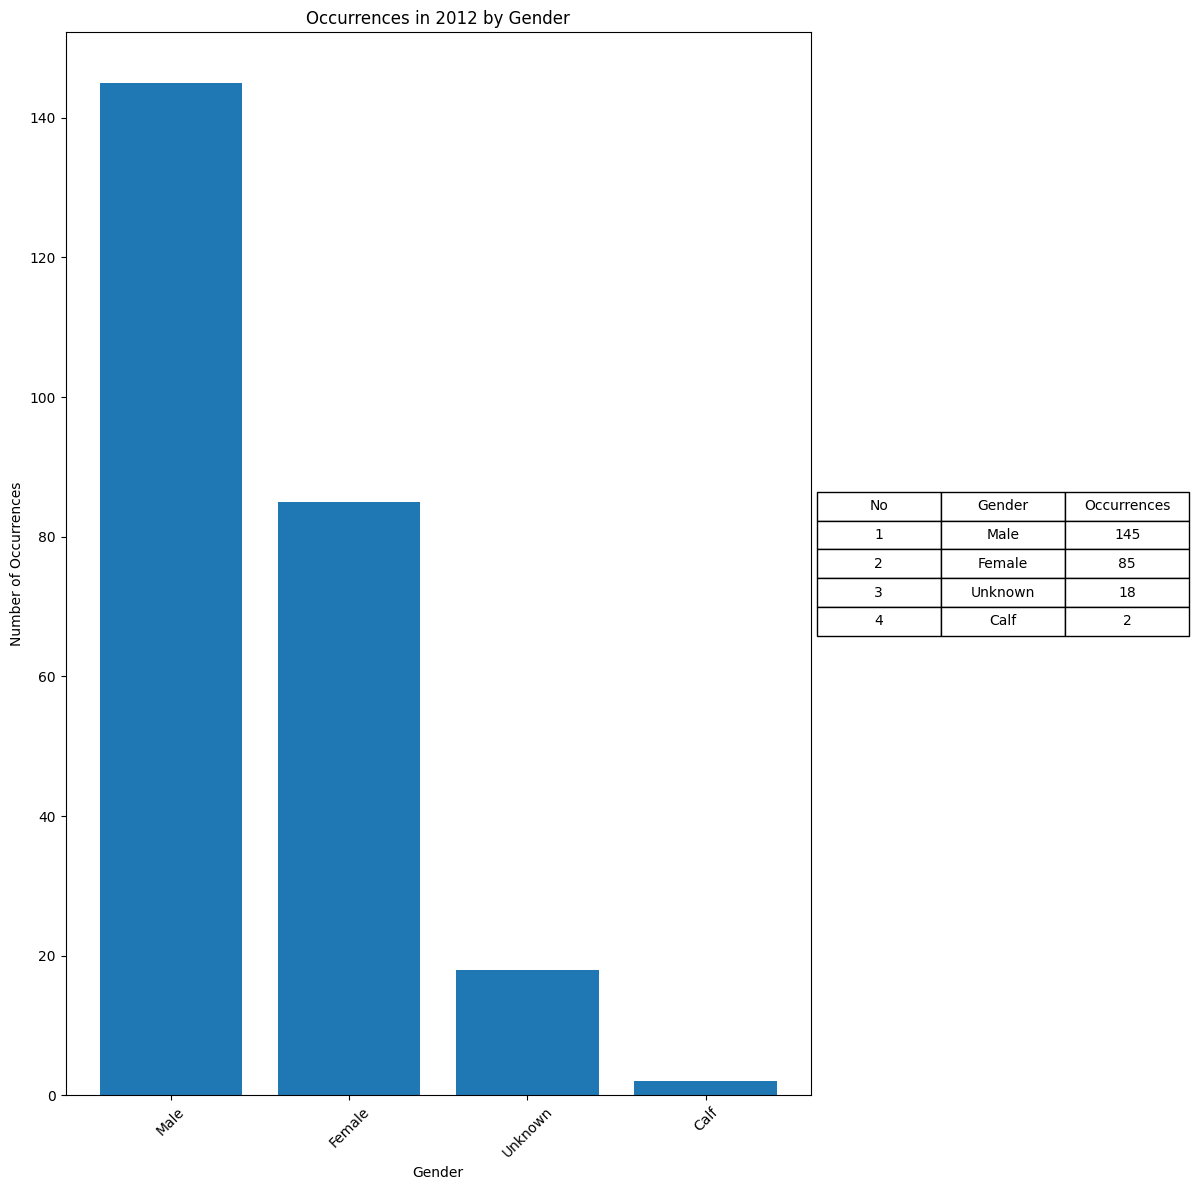

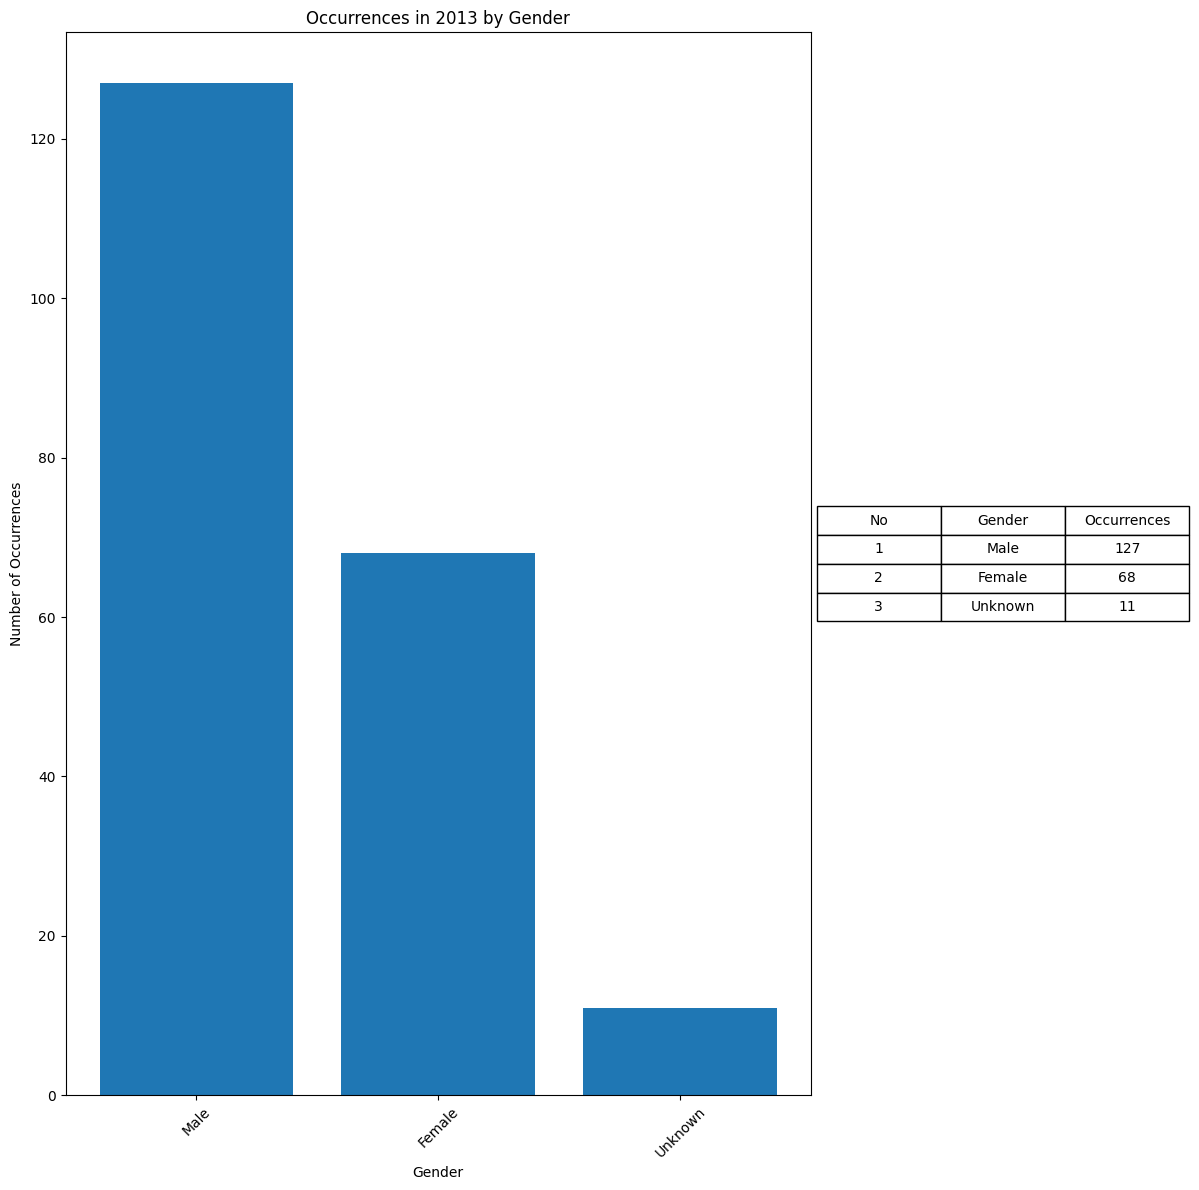

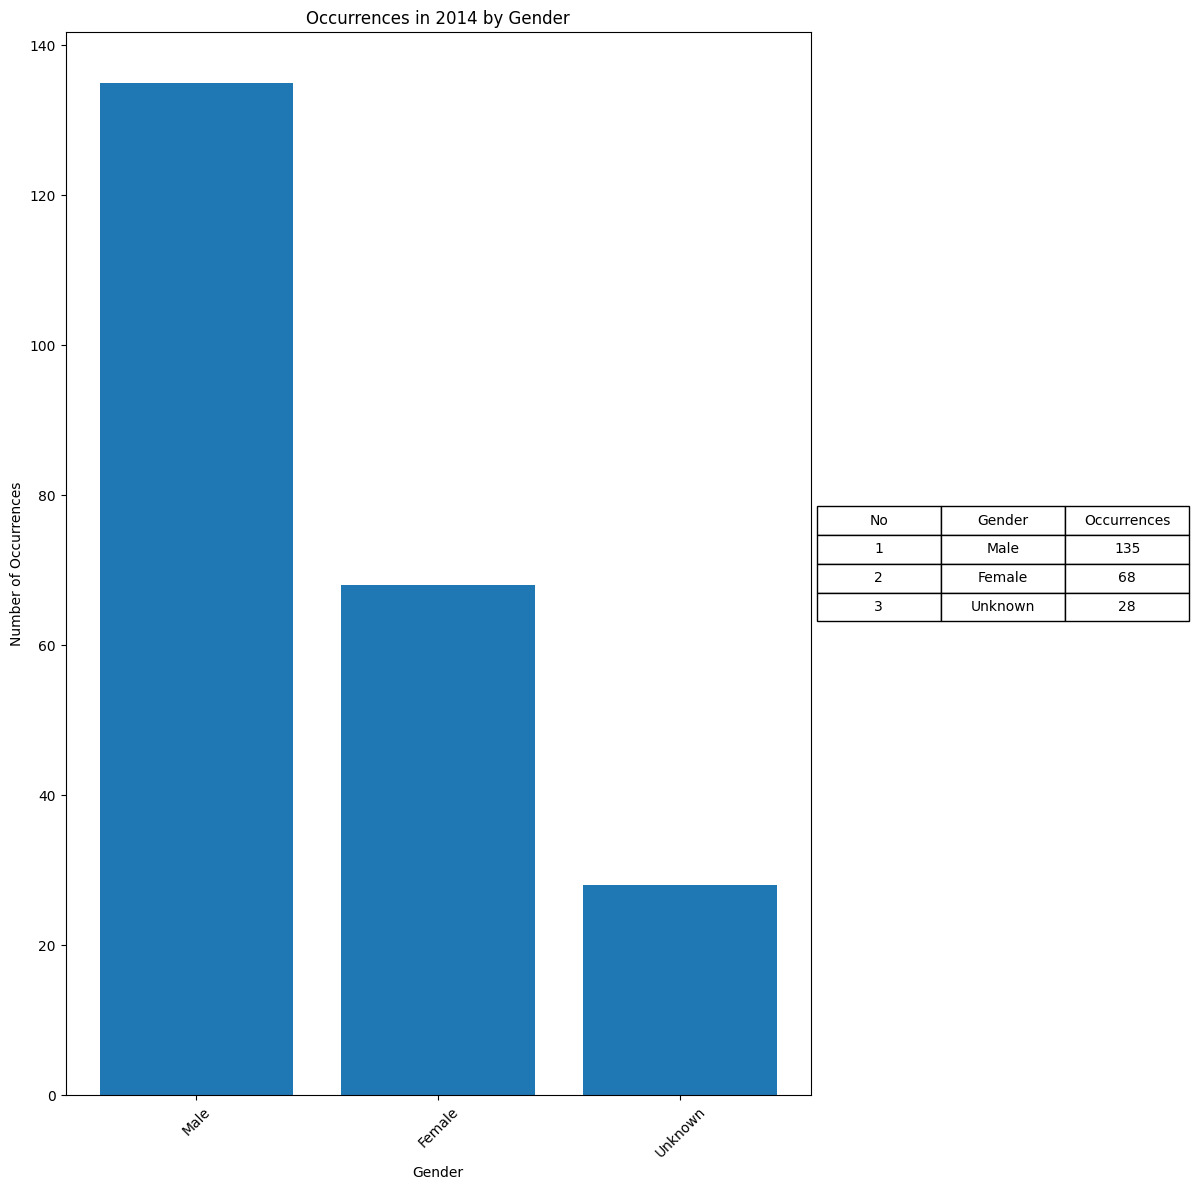

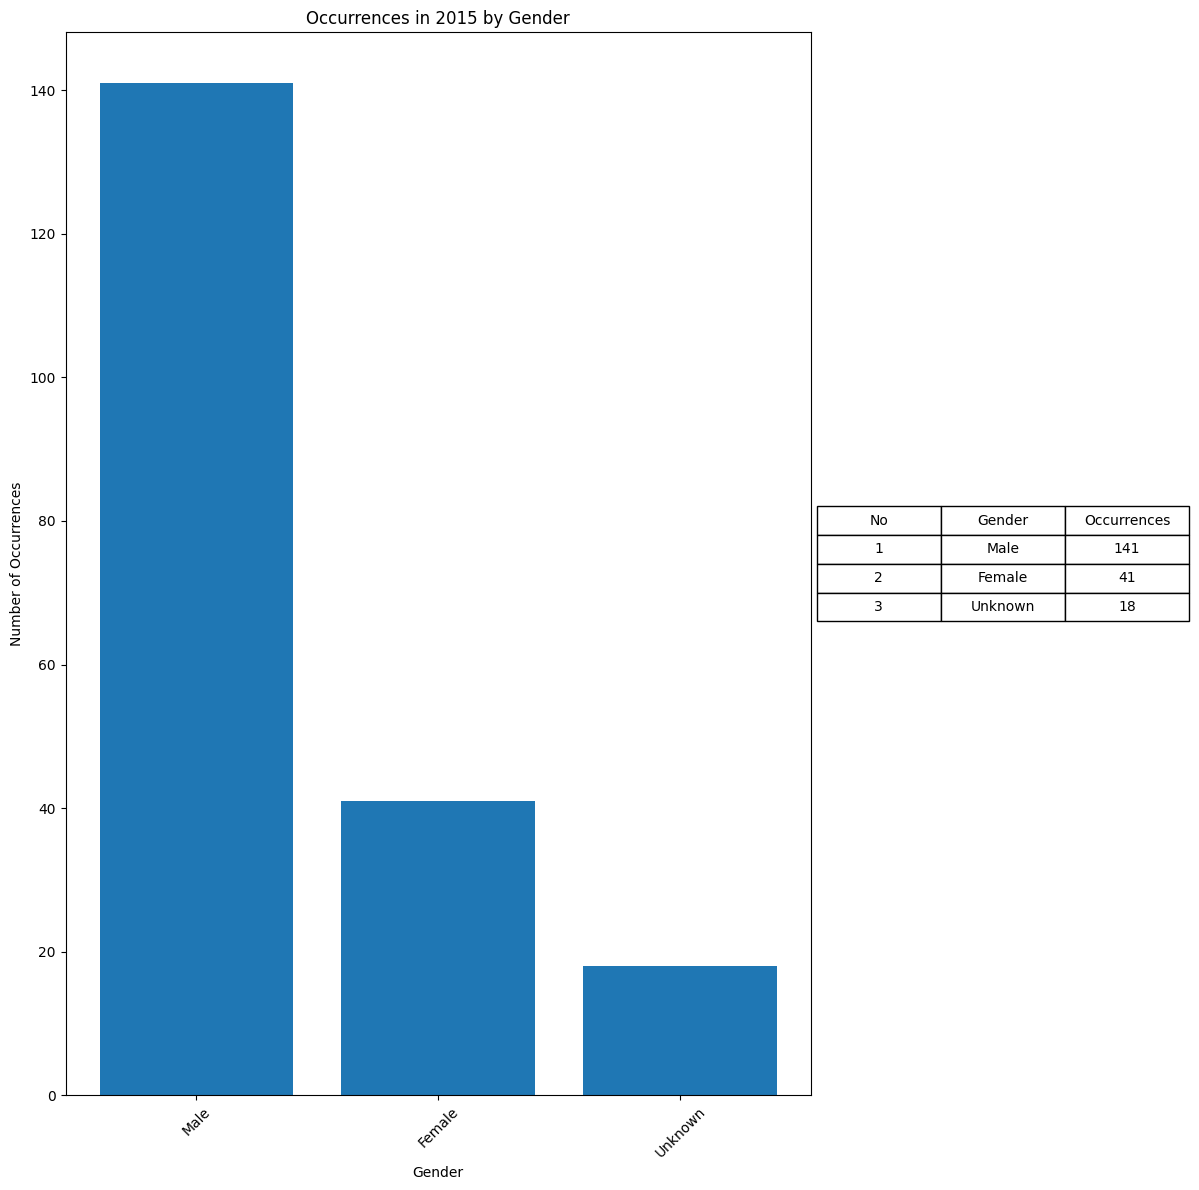

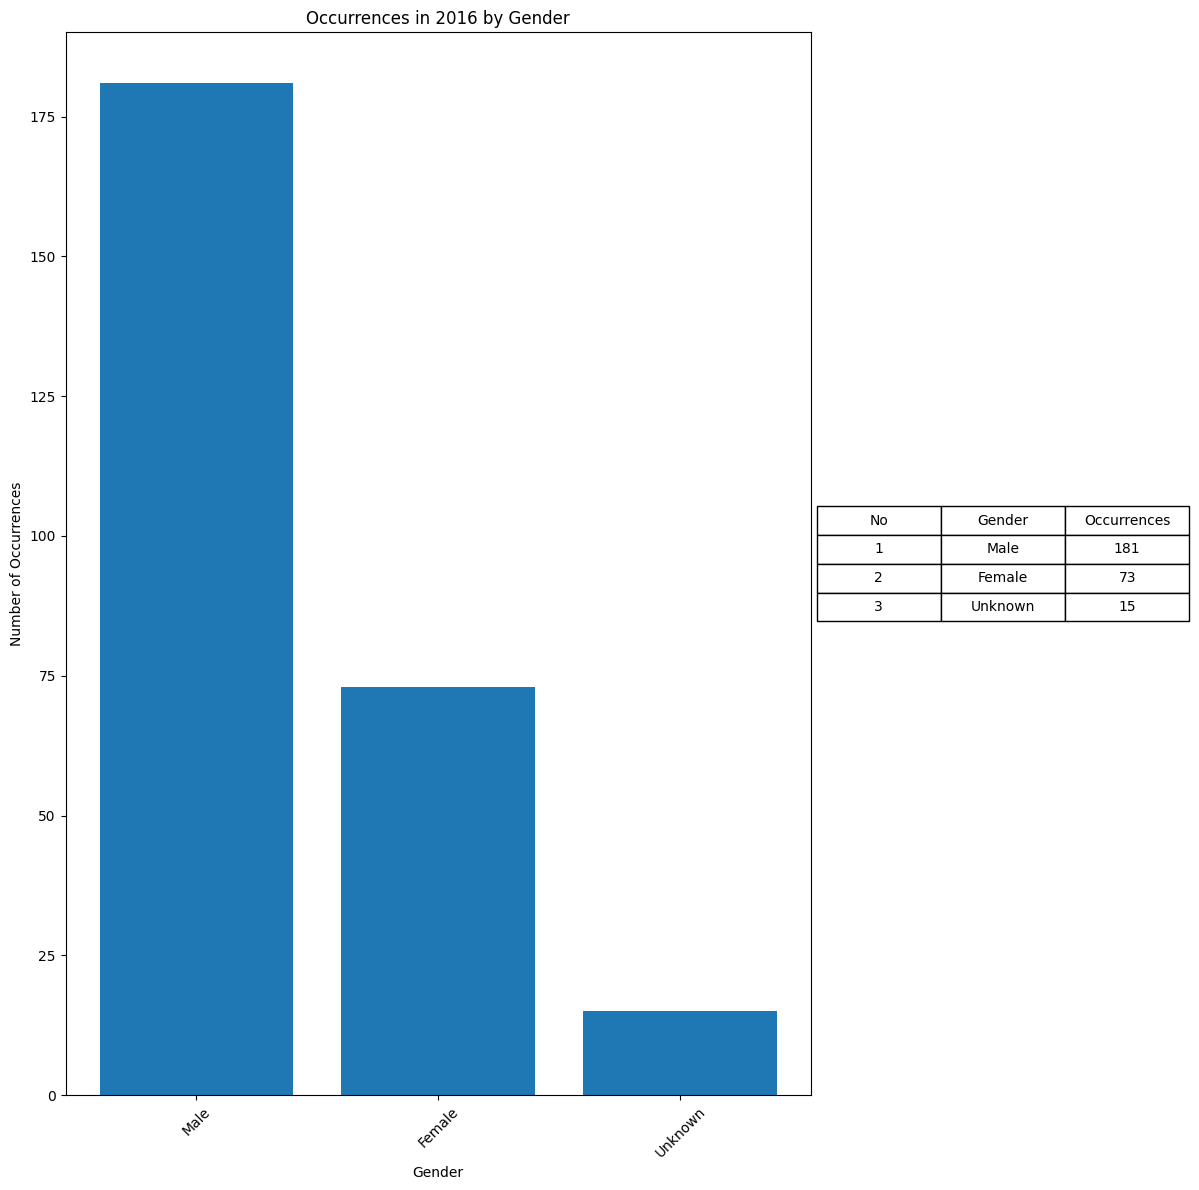

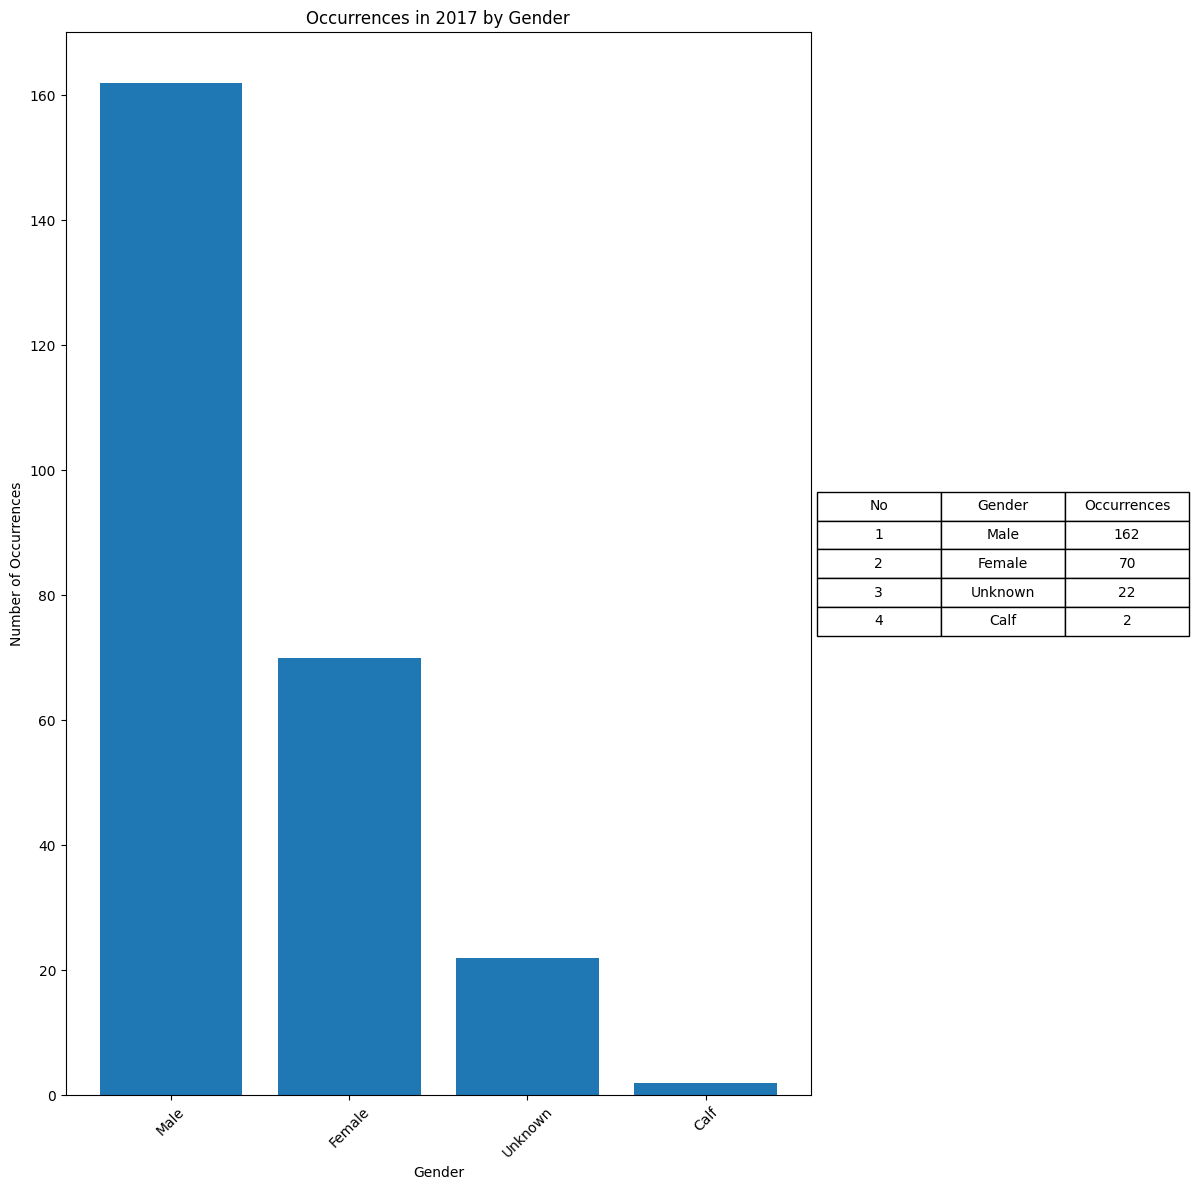

In [54]:
# Set 'Cause of Death' as index
sex_df = Sex_df.set_index('Gender', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = sex_df[sex_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Gender')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Gender')
    plt.xticks(rotation=45)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Gender', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [55]:
Sex_df = Sex_df.transpose().reset_index()

# Set the first row as column headers
Sex_df.columns = Sex_df.iloc[0]

# Drop the first row
Sex_df = Sex_df[1:]

<Figure size 3000x1800 with 0 Axes>

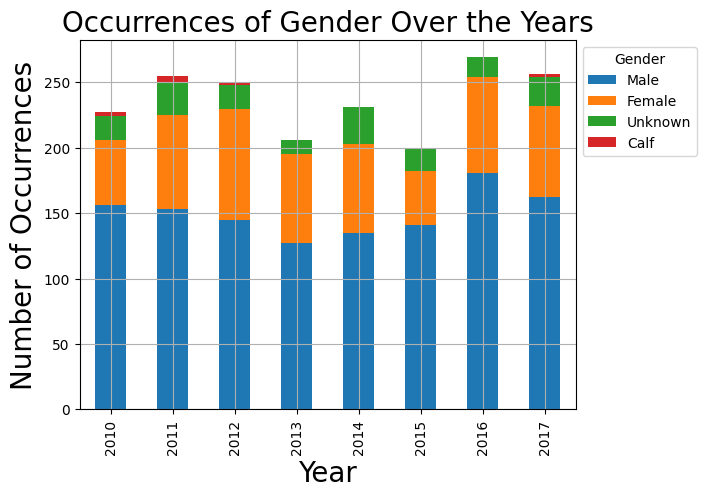

In [56]:
# Set 'D/S Office' as index
Sex_df.set_index('Gender', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = Sex_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Gender Over the Years', fontsize=20)

# Move the legend outside the plot to the right
ax.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()

## Age Category

In [57]:
# Create a dictionary to store Age category counts for each year
Age_counts = {}
for year, df in zip(range(2010, 2018), datasets):
    Age_count = df['Age Category'].value_counts().to_dict()
    Age_counts[year] = Age_count

# Create a DataFrame to store the Age category counts
Age_df = pd.DataFrame(Age_counts)

# Fill NaN values with 0 (if a Age category doesn't appear in a year's dataset)
Age_df = Age_df.fillna(0)

# Convert the values to integers
Age_df = Age_df.astype(int)

# Reset the index and rename the index column to 'Year'
Age_df =Age_df.reset_index().rename(columns={'index': 'Age Category'})

In [58]:
Age_df

Age Category  2010  2011  2012  2013  2014  2015  2016  2017
0  Subadults and adults   163   168   151   132   138   119   167   165
1              Juvenile    24    38    36    38    34    41    51    43
2                  Calf    17    20    19    17    19     9    21    14
3               Unknown    15    21    31    14    34    28    15    25
4                Infant     8     8    13     5     6     3    15     9

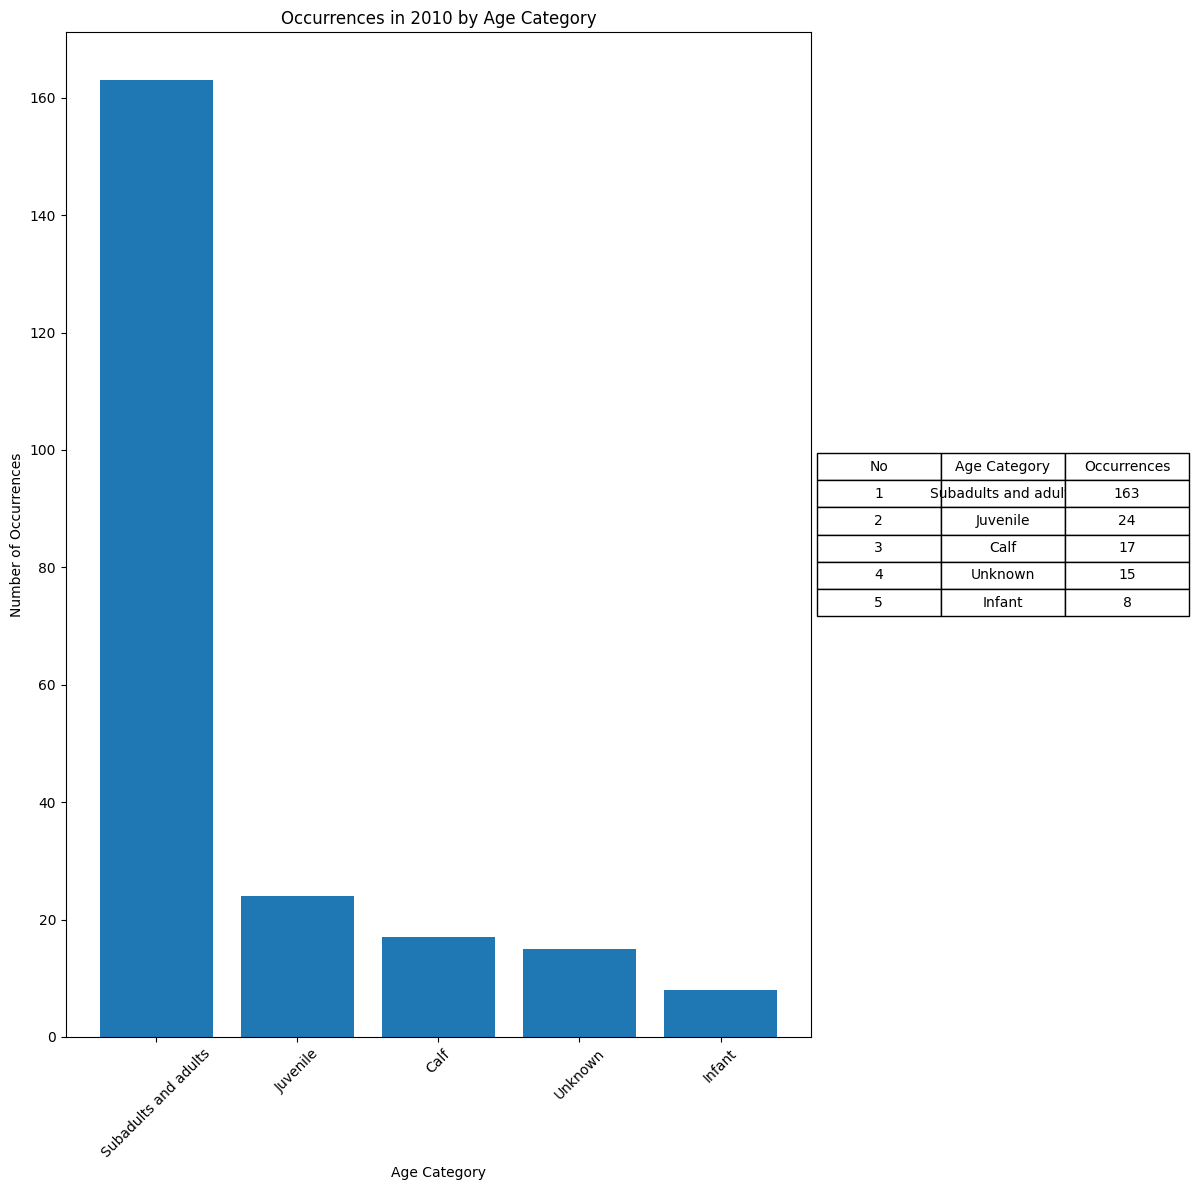

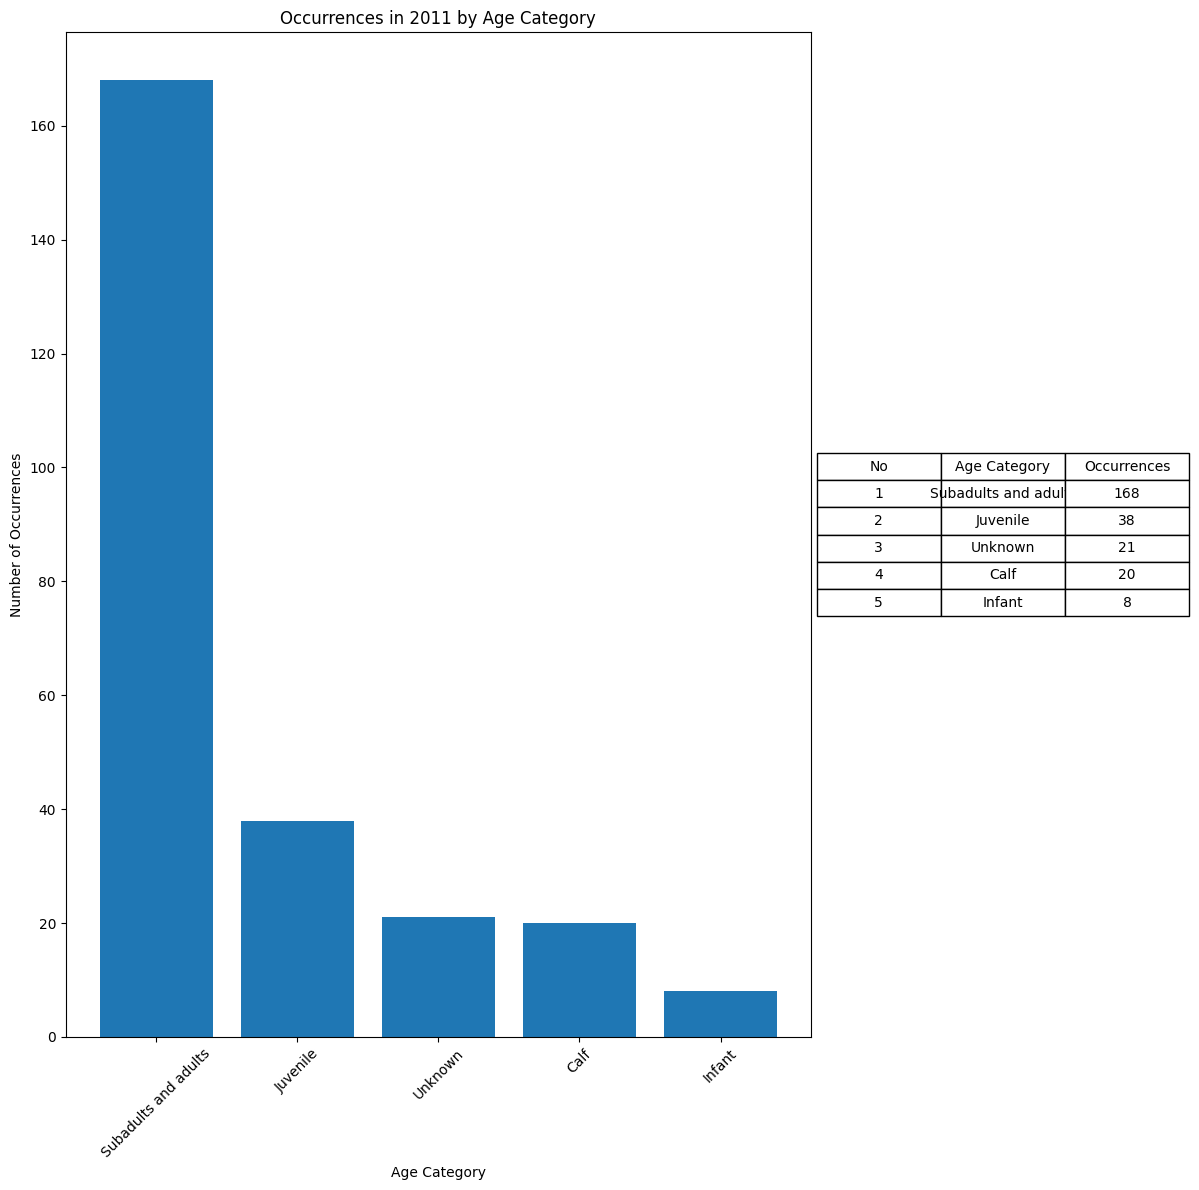

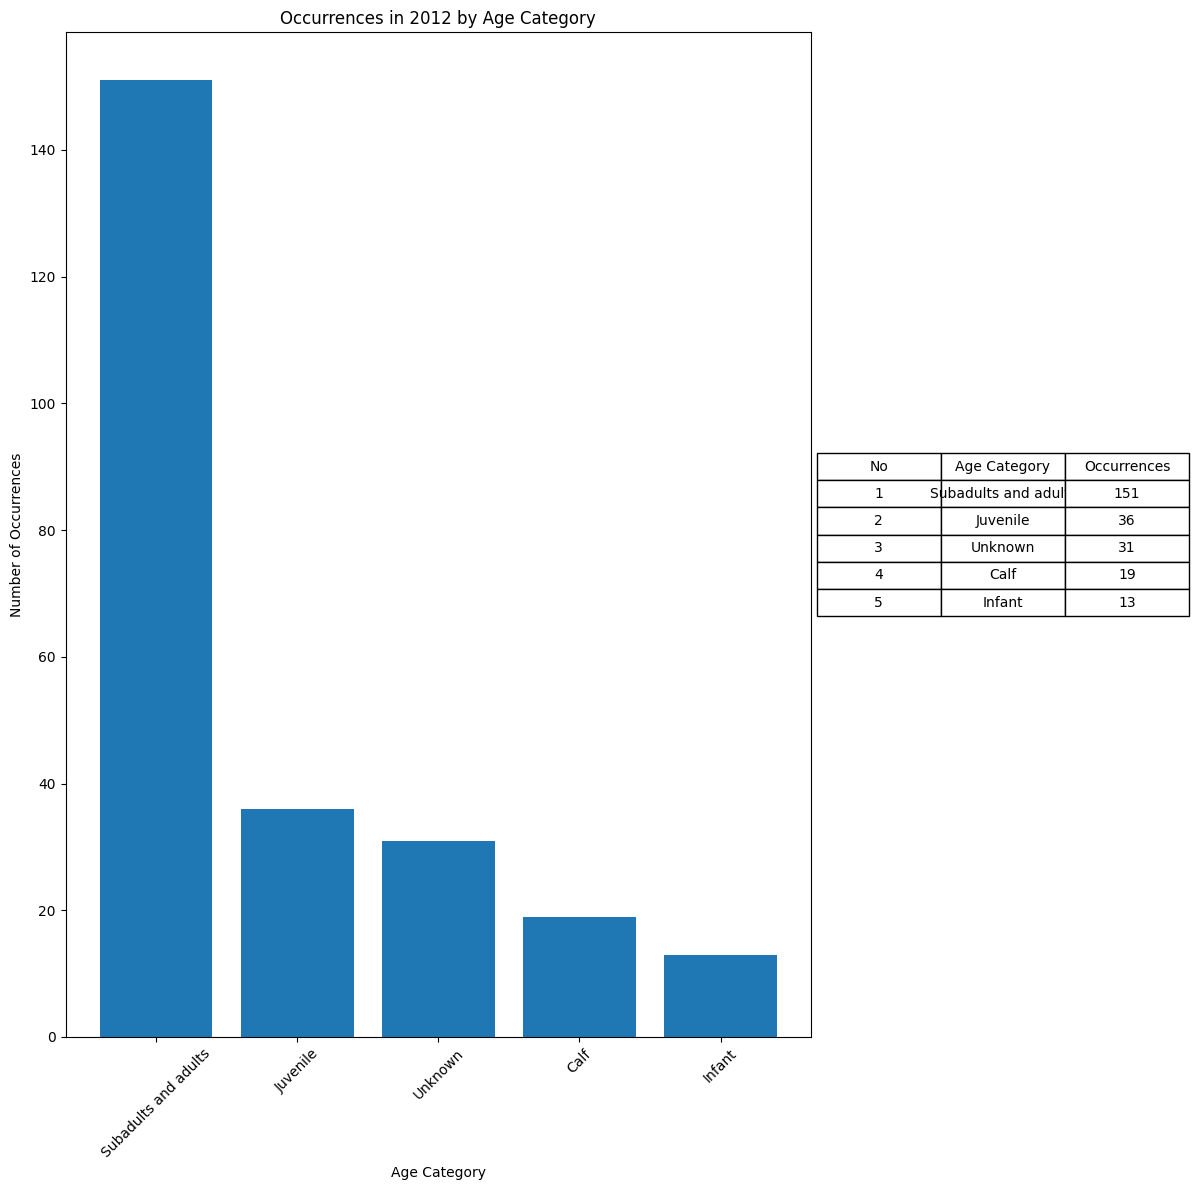

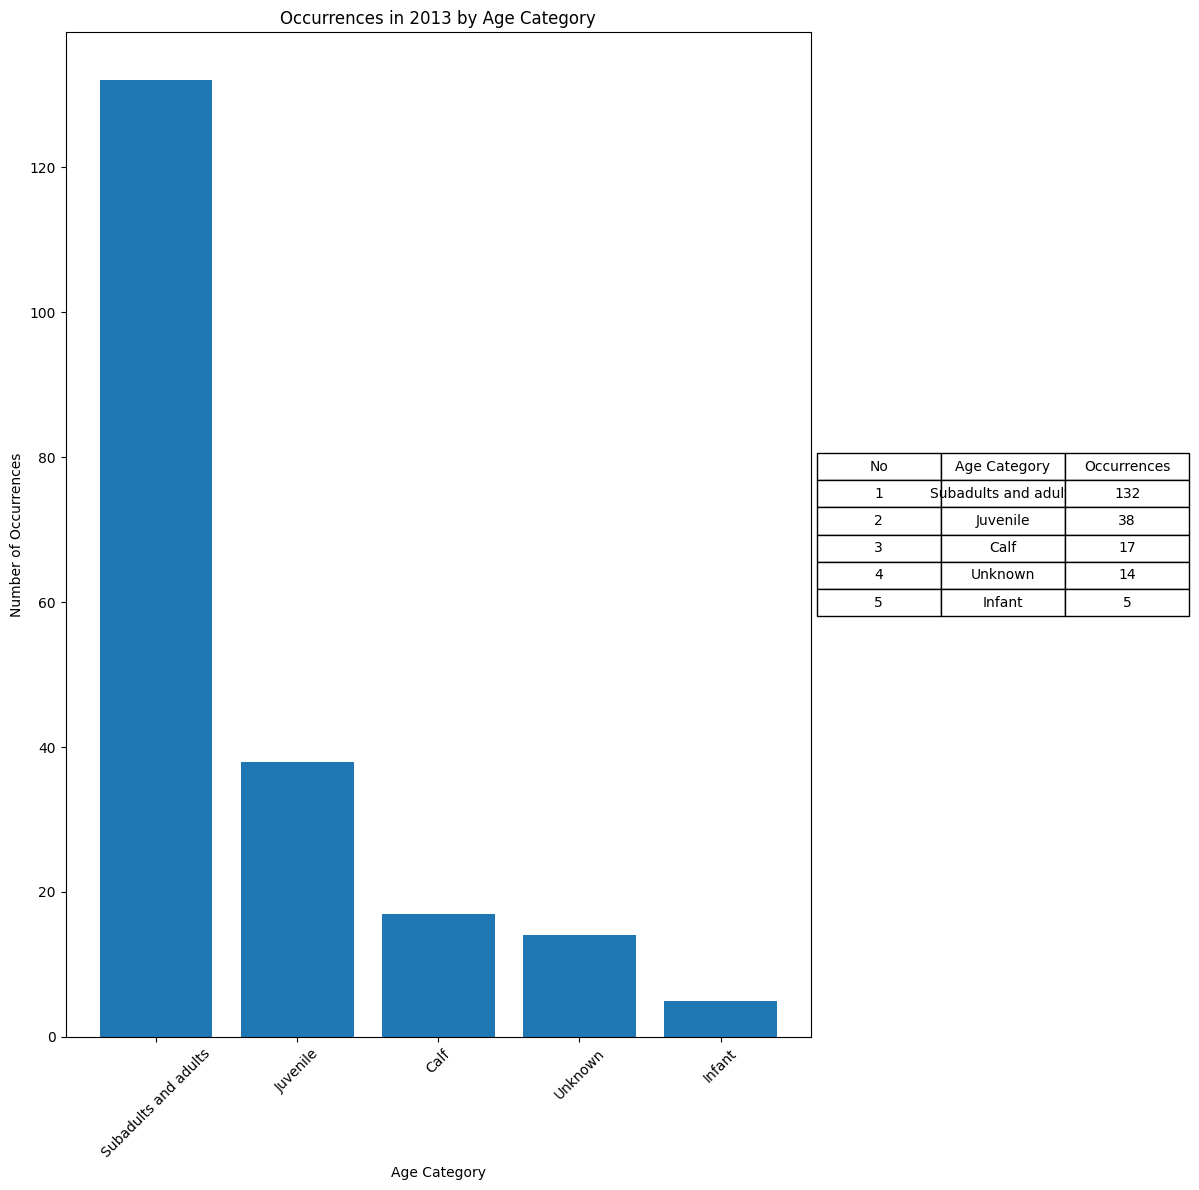

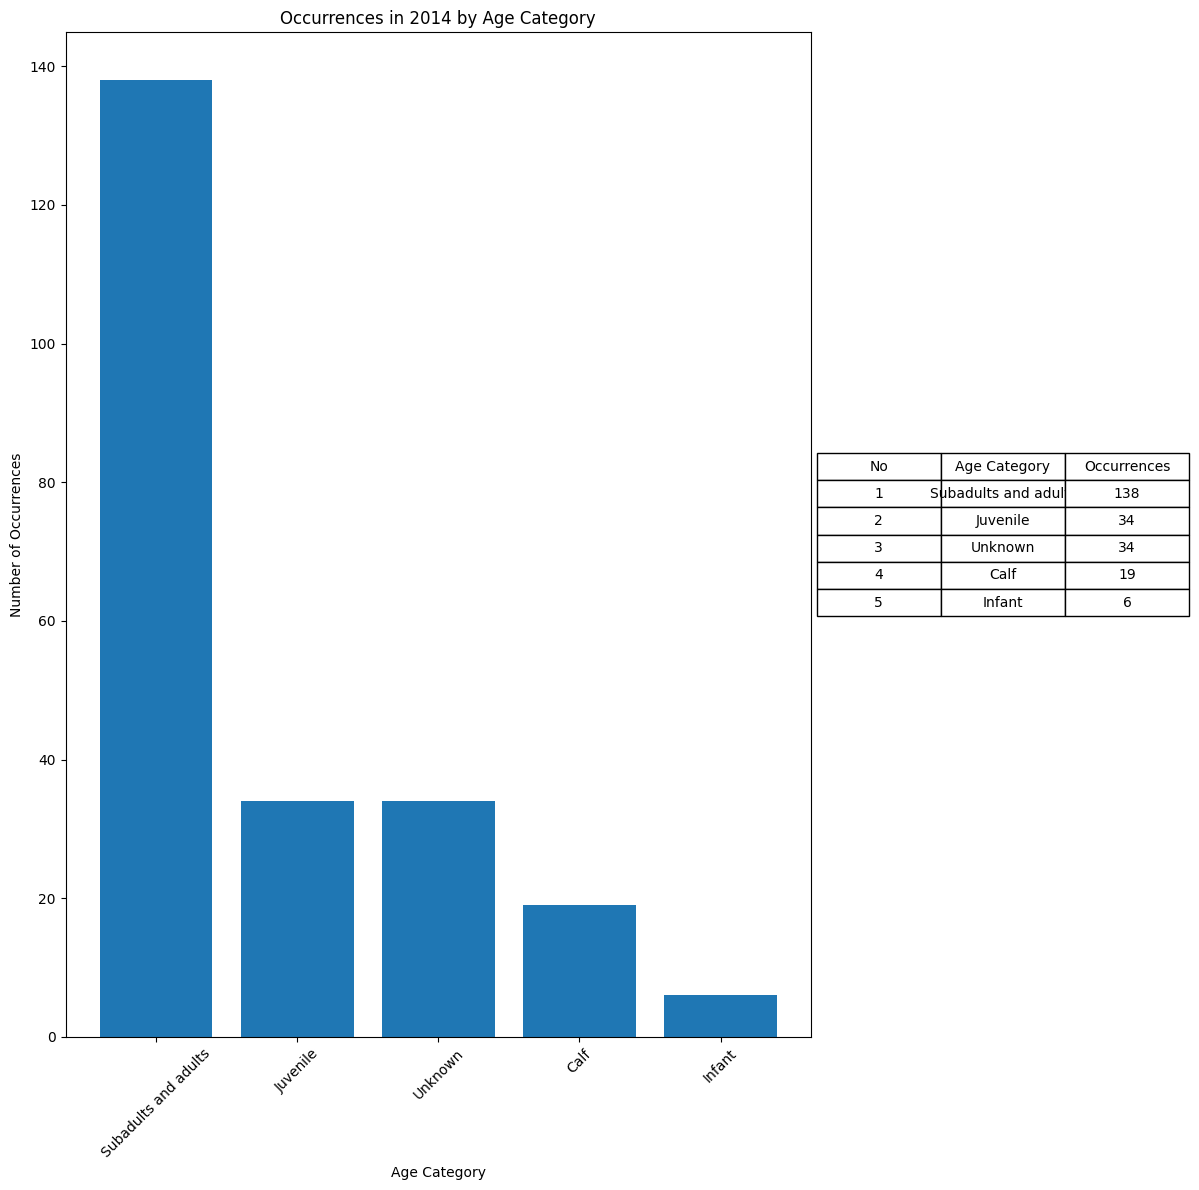

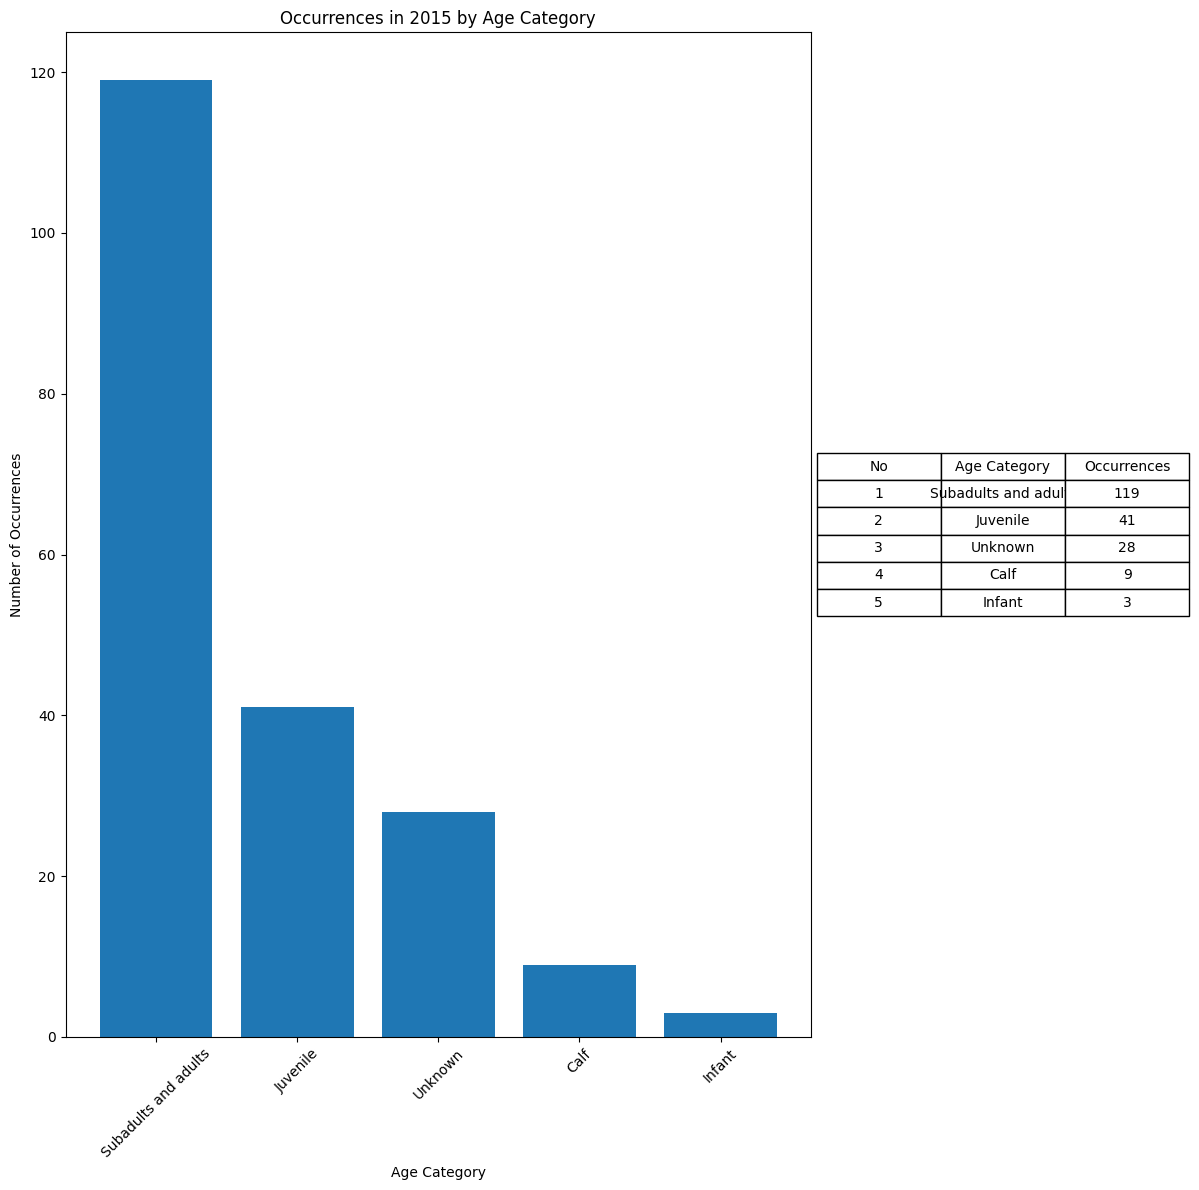

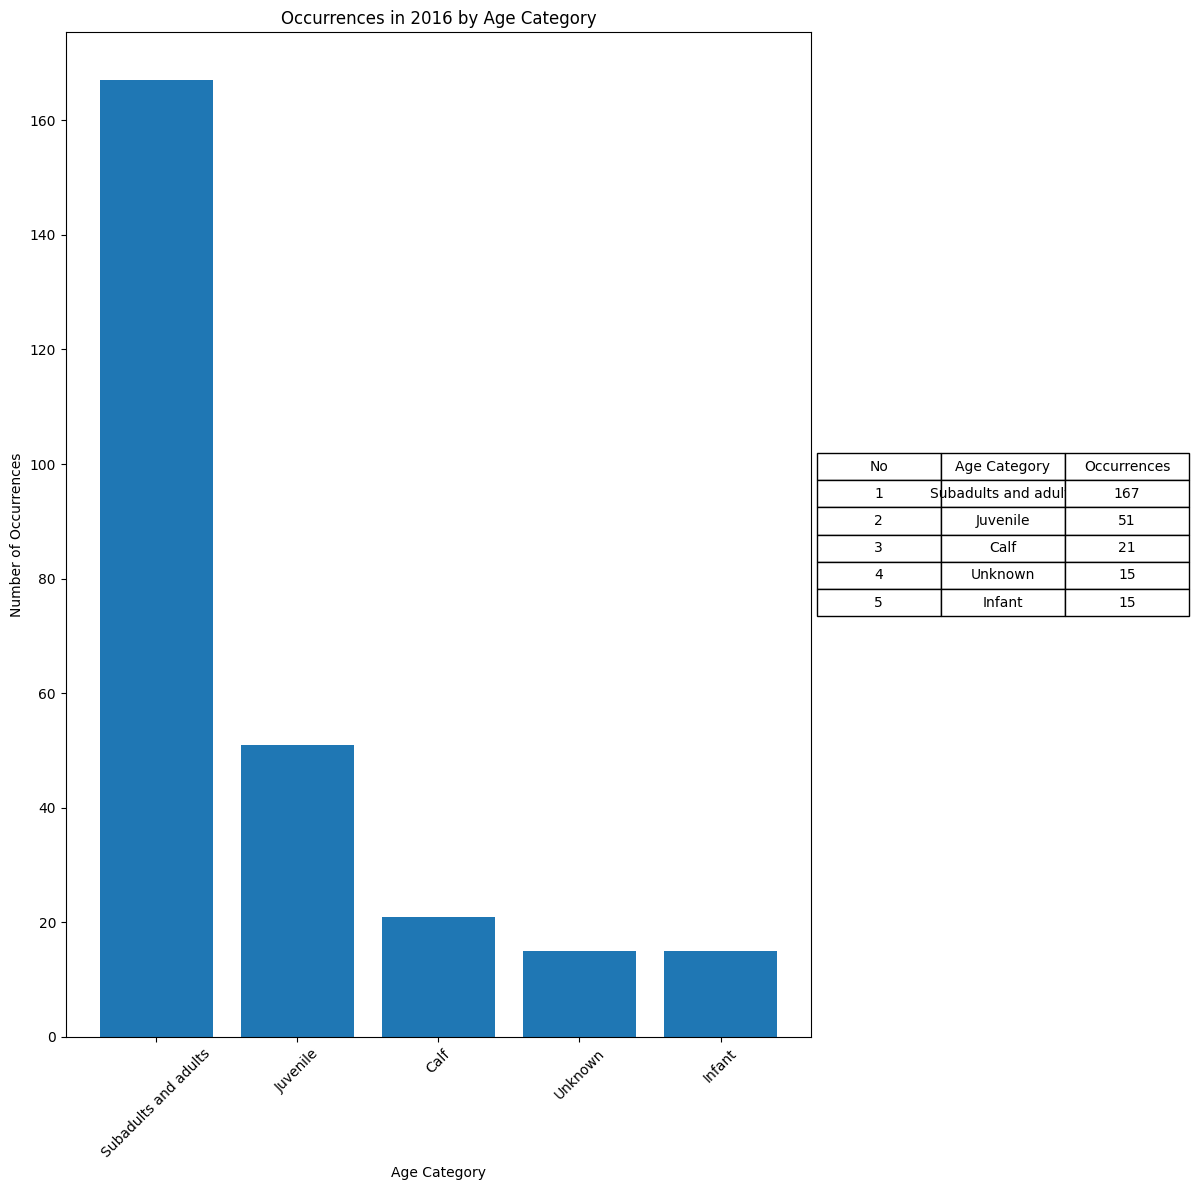

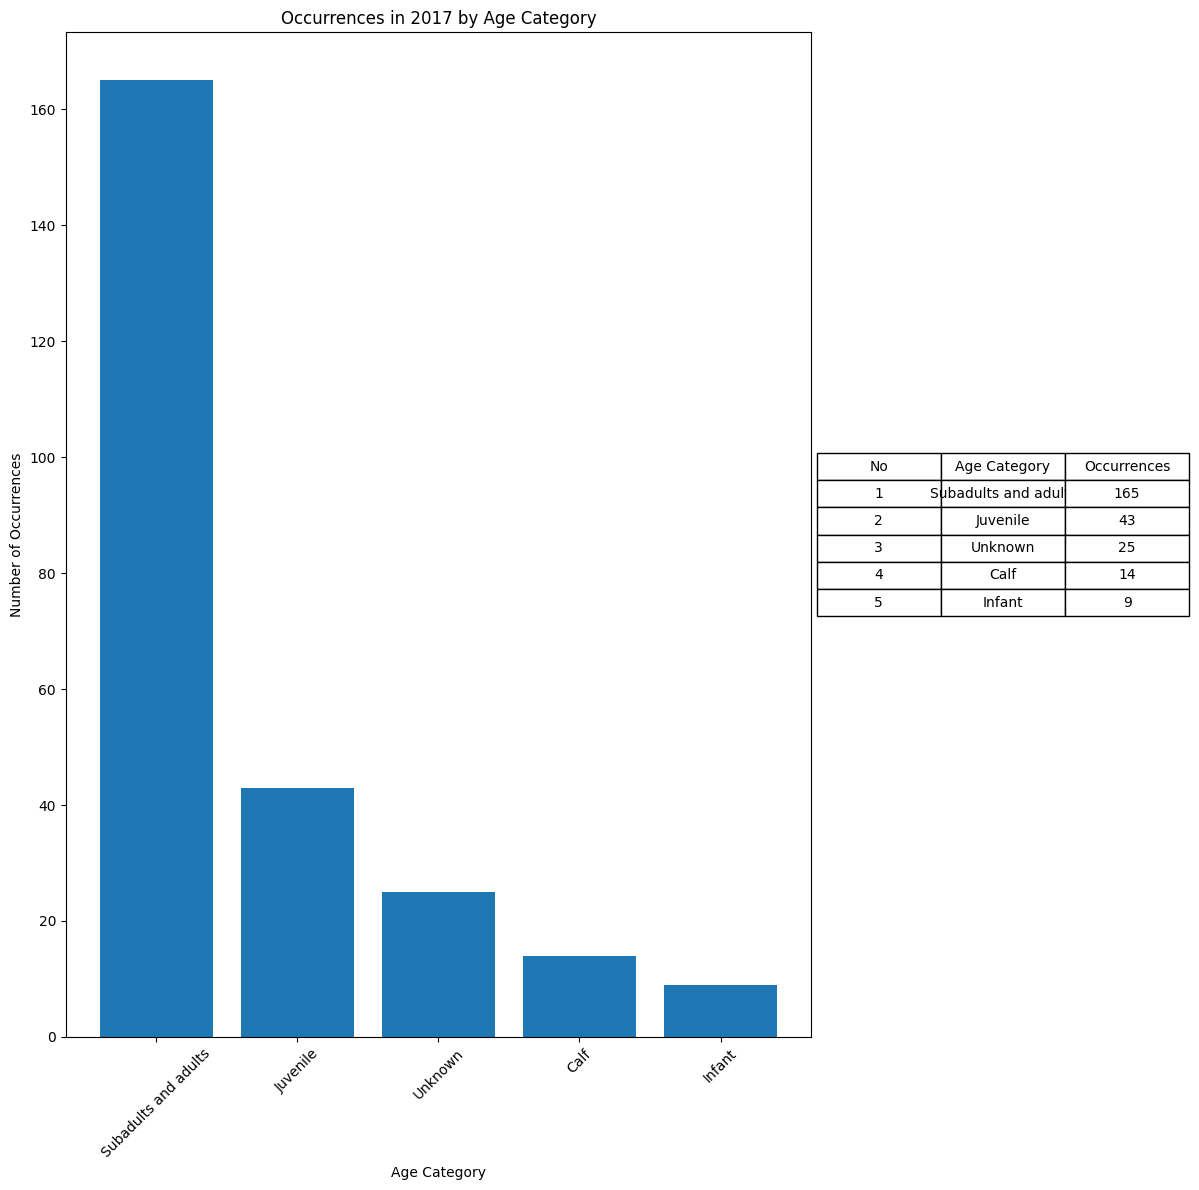

In [60]:
# Set 'Cause of Death' as index
age_df = Age_df.set_index('Age Category', inplace=False)

# Years to loop through
years = range(2010, 2018)

# Loop through each year
for year in years:
    plt.figure(figsize=(12, 12))
    
    # Filter out causes with occurrence 0 for the current year
    data_to_plot = age_df[age_df[year] > 0]
    
    # Create a grid with 2 rows and 2 columns
    gs = plt.GridSpec(1, 2, width_ratios=[3, 1])
    
    
    # Create the descending bar plot in the second cell of the grid
    plt.subplot(gs[0])
    descending_causes = data_to_plot[year].nlargest(len(data_to_plot))
    plt.bar(descending_causes.index, descending_causes)
    plt.xlabel('Age Category')
    plt.ylabel('Number of Occurrences')
    plt.title(f'Occurrences in {year} by Age Category')
    plt.xticks(rotation=45)
    
    

    # Create the descending table as a separate subplot in the fourth cell of the grid
    table_ax2 = plt.subplot(gs[1])
    table_data2 = [['No', 'Age Category', 'Occurrences']] + [[i + 1, r, c] for i, (r, c) in enumerate(zip(descending_causes.index, descending_causes))]
    col_labels2 = table_data2.pop(0)
    table2 = table_ax2.table(cellText=table_data2, colLabels=col_labels2, cellLoc='center', loc='center')
    table2.auto_set_font_size(False)
    table2.set_fontsize(10)
    table2.scale(1.5, 1.5)  # Adjust the table size
    table_ax2.axis('off')

    plt.tight_layout()
    plt.show()


In [31]:
Age_df = Age_df.transpose().reset_index()

# Set the first row as column headers
Age_df.columns = Age_df.iloc[0]

# Drop the first row
Age_df = Age_df[1:]

<Figure size 3000x1800 with 0 Axes>

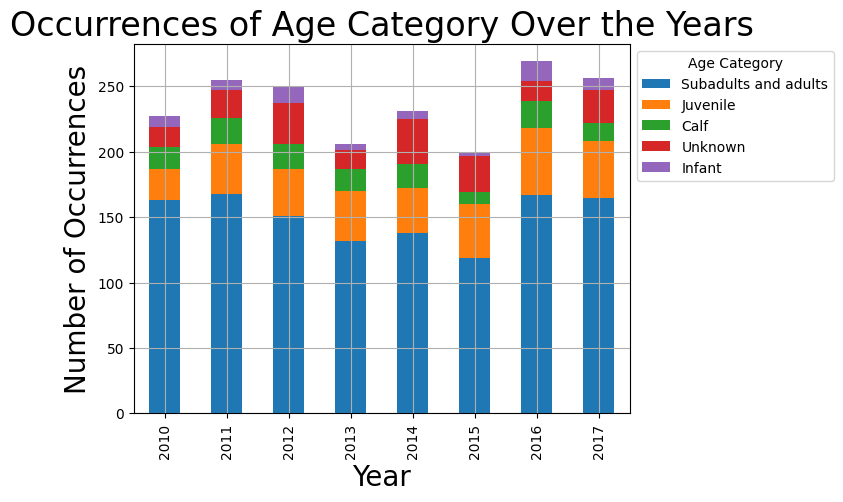

In [32]:
# Set 'D/S Office' as index
Age_df.set_index('Age Category', inplace=True)

# Create a stacked bar plot
plt.figure(figsize=(30, 18))
ax = Age_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.title('Occurrences of Age Category Over the Years', fontsize=24)

# Move the legend outside the plot to the right
ax.legend(title='Age Category', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Display the plot
plt.grid(True)
#plt.tight_layout()  # Ensures the legend fits within the plot area
plt.show()